# Unperturbed Green's Function

We seek here the numerical solution for the _unperturbed_ normal propagator $\mathcal{G}^{(0)}$ that must be a solution of the differential equation 
$$
\Bigl( \hbar \omega - h_{MTI}(-i\partial_z) \Bigr) \mathcal{G}^{(0)}_{MTI}(z,z';\omega) = \hbar \delta(z-z') \,,
$$
where $h_{MTI}$ is the three-dimensional Hamiltonian for an MTI slab with finite thickness $d$ along the $z$ direction and fully translational invariant on the $x,y$ plane.

## **Homogeneous Solution**
To start, we need to find the general solution to the corresponding homogeneous system of equations
$$
    \Bigl( \hbar \omega - h_{MTI}(-i\partial_z) \Bigr) \mathcal{G}^{(0)}_{MTI}(z,z';\omega) = 0 \,,
$$
where the MTI Hamiltonian can be decomposed as $\hat{h}_{MTI} = h_\parallel(k_x,k_y) + h_{z}(-i\partial_z)$, and in the basis $\{ \ket{+,\uparrow}, \ket{+,\downarrow}, \ket{-,\uparrow}, \ket{-,\downarrow} \}$ take the following form
$$
	h_\parallel(k_x,k_y) =
	\begin{bmatrix}
		\varepsilon_0 + \mu_0 + \Lambda & 0 & 0 & A_2 k_-\\[5pt]
		%
		0 & \varepsilon_0 + \mu_0 - \Lambda & A_2 k_+ & 0 \\[5pt]
		%
		0 & A_2 k_- & \varepsilon_0 - \mu_0 + \Lambda & 0 \\[5pt]
		%
		A_2 k_+ & 0 & 0 & \varepsilon_0 - \mu_0 - \Lambda \\[5pt]
	\end{bmatrix} \,,
$$
$$
	h_{z}(-i\partial_z) = 
	\begin{bmatrix}
		(B_1-D_1)\partial_z^2 & 0 & -i A_1 \partial_z  & 0 \\[5pt]
		%
		0 & (B_1-D_1)\partial_z^2 & 0 & i A_1 \partial_z 	 \\[5pt]
		%
		-i A_1 \partial_z & 0 & -(B_1+D_1)\partial_z^2 & 0 \\[5pt]
		%
		0 & i A_1 \partial_z & 0 & -(B_1+D_1)\partial_z^2 
	\end{bmatrix} \,,
$$
and we defined $\varepsilon_0 \equiv C + D_2 k^2$, $\mu_0 \equiv M - B_2k^2$, $k^2 \equiv k_x^2 + k_y^2$ and $k_\pm \equiv k_x \pm i k_y$.
The matrix $\mathcal{G}^{(0)}_{MTI}(z,z';\omega)$ can be represented as
$$
	\mathcal{G}_{MTI}^{(0)} = 
	\begin{bmatrix}
		g_{\uparrow +, \uparrow +} & g_{\uparrow +, \downarrow +} & 
		g_{\uparrow +, \uparrow -} & g_{\uparrow +, \downarrow -} \\[5pt]
		%
		g_{\downarrow +, \uparrow +} & g_{\downarrow +, \downarrow +} & g_{\downarrow +, \uparrow -} & g_{\downarrow +, \downarrow -} \\[5pt]
		%
		g_{\uparrow -, \uparrow +} & g_{\uparrow -, \downarrow +} &
		g_{\uparrow -, \uparrow -}  & g_{\uparrow -, \downarrow -}  \\[5pt]
		%
		g_{\downarrow -, \uparrow +}  & g_{\downarrow -, \downarrow +} &
		g_{\downarrow -, \uparrow -} & g_{\downarrow -, \downarrow -}
	\end{bmatrix} \,,
$$
and contains the 16 unknowns $g_{\sigma\lambda, \sigma'\lambda'}$ which we aim to find by solving the Gor'kov differential equations.

In [1]:
import numpy as np
from scipy.linalg import expm

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

Firstly, we can observe that the 16 equations can be separated into 4 _identical_ systems of 4 equations, one for each column of the matrix $\mathcal{G}^{(0)}$.
Defined the four unknowns as
$$
	x_1 \equiv g_{\uparrow +, \, \sigma'\lambda'} \,,
	\qquad
	x_2 \equiv g_{\downarrow +, \, \sigma'\lambda'} \,,
	\qquad
 	x_3 \equiv g_{\uparrow -, \, \sigma'\lambda'} \,,
	\qquad
	x_4 \equiv g_{\downarrow -, \, \sigma'\lambda'} \,,
$$
we can write down the equations explicitly as
$$
	\begin{split}
		(B_1-D_1) \partial_z^2 x_1 &= - (\epsilon_0 + \mu_0 + \Lambda - \hbar\omega) x_1 - A_2 k_- x_4 + i A_1 \partial_z x_3 \,, \\[5pt]
		%
		(B_1-D_1) \partial_z^2 x_2 &=  - (\epsilon_0 + \mu_0 - \Lambda - \hbar\omega) x_2 - A_2 k_+ x_3 - i A_1 \partial_z x_4  \,, \\[5pt]
		%
		(B_1+D_1) \partial_z^2 x_3 &= (\epsilon_0 - \mu_0 + \Lambda - \hbar\omega) x_3 + A_2 k_- x_2 - i A_1 \partial_z x_1   \,, \\[5pt]
		%
		(B_1+D_1) \partial_z^2 x_4 &= (\epsilon_0 - \mu_0 - \Lambda - \hbar\omega) x_4 + A_2 k_+ x_1 + i A_1 \partial_z x_2  \,.
	\end{split}
$$

The previous system of equations can be rearranged into a first order differential matrix equation
$$
    \partial_z \mathbf{X} = \mathbb{M} \mathbf{X}
$$
where we defined the vector of unknowns
$$
\mathbf{X} = 
	\begin{pmatrix}
		x_1 & x_2 & x_3 & x_4 &
        \partial_z x_1 & \partial_z x_2 & \partial_z x_3 & \partial_z x_4  
	\end{pmatrix}^T \,,
$$
and the matrix 
$$
    \mathbb{M} = 
    \begin{bmatrix}
		0 & 1 \\
        C & D 
	\end{bmatrix} \,.
$$
The sub-blocks matrix of the previous equation are given by
$$
    C = 
    \begin{bmatrix}
		-\frac{1}{B1-D1}(\epsilon_0 + \mu_0 + \Lambda - \hbar\omega) & 0 & 0 & -\frac{1}{B1-D1}A_2 k_- \\[5pt]
        %
        0 & -\frac{1}{B1-D1}(\epsilon_0 + \mu_0 - \Lambda - \hbar\omega) & -\frac{1}{B1-D1}A_2 k_+ & 0 \\[5pt]
        %
        0 & \frac{1}{B1+D1}A_2 k_- & \frac{1}{B1+D1}(\epsilon_0 - \mu_0 + \Lambda - \hbar\omega) & 0 \\[5pt]
        %
        \frac{1}{B1+D1}A_2 k_+ & 0 & 0 & \frac{1}{B1+D1}(\epsilon_0 - \mu_0 - \Lambda - \hbar\omega) \\[5pt]
	\end{bmatrix} \,,
$$
and
$$
    D = 
    \begin{bmatrix}
		0 & 0 & \frac{1}{B1-D1} iA_1 & 0 \\[5pt]
        %
        0 & 0 & 0 & -\frac{1}{B1-D1} iA_1 \\[5pt]
        %
        -\frac{1}{B1+D1} iA_1 & 0 & 0 & 0 \\[5pt]
        %
        0 & \frac{1}{B1+D1} iA_1 & 0 & 0 \\[5pt]
	\end{bmatrix} \,,
$$
while $0$ and $1$ are the zero and the identity $4\times4$ matrices, respectively.

In [2]:
# Function defining the Matrix M
def Mmat(kx, ky, L, w, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar = 1.):

    # abbreviations
    k = np.sqrt(kx**2+ky**2); e0 = C + D2*k**2; m0 = M - B2*k**2

    # denominators
    a = 1./(B1-D1); b = 1./(B1+D1)

    # Zero Matrix
    zero = np.zeros((4,4))

    # Unitary Matrix
    id = np.identity(4)

    # Matrix C (Constant)
    Cmat = np.array(
        [[-a*(e0+m0+L-hbar*w), 0, 0, -a*A2*(kx-1j*ky)],
         [0, -a*(e0+m0-L-hbar*w), -a*A2*(kx+1j*ky),0],
         [0, b*A2*(kx-1j*ky), b*(e0-m0+L-hbar*w), 0],
         [b*A2*(kx+1j*ky), 0, 0, b*(e0-m0-L-hbar*w)]])

    # Matrix D (first derivatives)
    Dmat = np.array(
        [[0, 0, 1j*a*A1, 0],
         [0, 0, 0, -1j*a*A1],
         [-1j*b*A1, 0, 0, 0],
         [0, 1j*b*A1, 0, 0]])
    
    # Compone the matrix M
    return np.block([[zero, id], [Cmat, Dmat]])

The solution of the previous system is given by 
$$
    \mathbf{X} = e^{\mathbb{M} z} \, \mathbf{C} \,,
$$
where $\mathbf{C} = \left( C_1, \dots C_8 \right)^T$ is an 8-components vector and $C_i \equiv C_i(z')$ are in principle functions of $z'$.
The computation of the general solution to the homogeneous system thus reduces to the calculation of the exponential of the matrix $\mathbb{M}$.

#### <font color='green'> **Real Part** </font> 

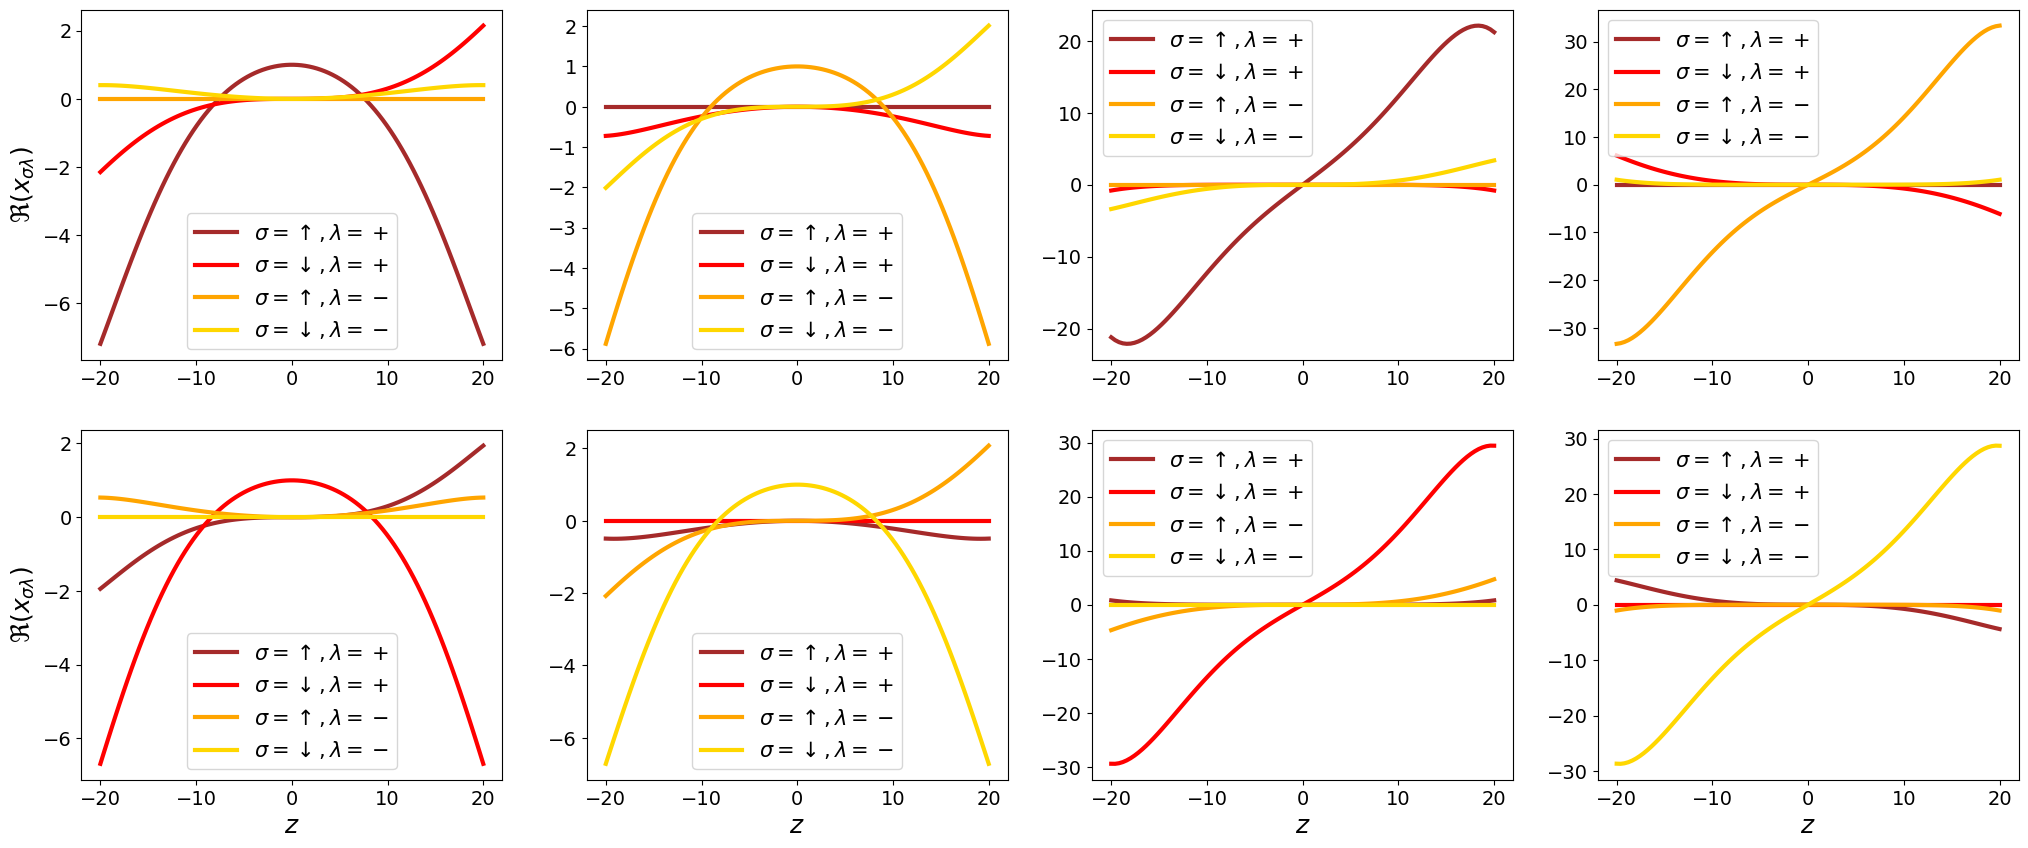

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm


# Function computing the exponetial matrix exp(Mz)
def expMz(z, kx, ky, L, w, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar = 1.):

    return expm( Mmat(kx, ky, L, w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)*z )


# z range
Z = np.linspace(-20,20, 100)
# colors 
c = ['brown','red','orange','gold']
# subplots
fig, axs = plt.subplots(2,4, figsize=(25, 10))


for i in range(2):
    for j in range(4):
        
        idx = 2*j + i
        
        axs[i][j].plot(Z, [expMz(z, kx=0.01, ky=0.02, L=0.03, w=0.01)[0][idx].real for z in Z], c=c[0], label='$\sigma=\\uparrow, \lambda=+$', lw=3)
        axs[i][j].plot(Z, [expMz(z, kx=0.01, ky=0.02, L=0.03, w=0.01)[1][idx].real for z in Z], c=c[1], label='$\sigma=\downarrow , \lambda=+$', lw=3)
        axs[i][j].plot(Z, [expMz(z, kx=0.01, ky=0.02, L=0.03, w=0.01)[2][idx].real for z in Z], c=c[2], label='$\sigma=\\uparrow, \lambda=-$', lw=3)
        axs[i][j].plot(Z, [expMz(z, kx=0.01, ky=0.02, L=0.03, w=0.01)[3][idx].real for z in Z], c=c[3], label='$\sigma=\downarrow , \lambda=-$', lw=3)

        if i == 1:
            axs[i][j].set_xlabel('$z$', fontsize = 18)

        if j == 0: 
            axs[i][j].set_ylabel('$\Re (x_{\sigma\lambda})$', fontsize = 18)
            
        axs[i][j].tick_params(axis='both', which='major', labelsize=14)        
        axs[i][j].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

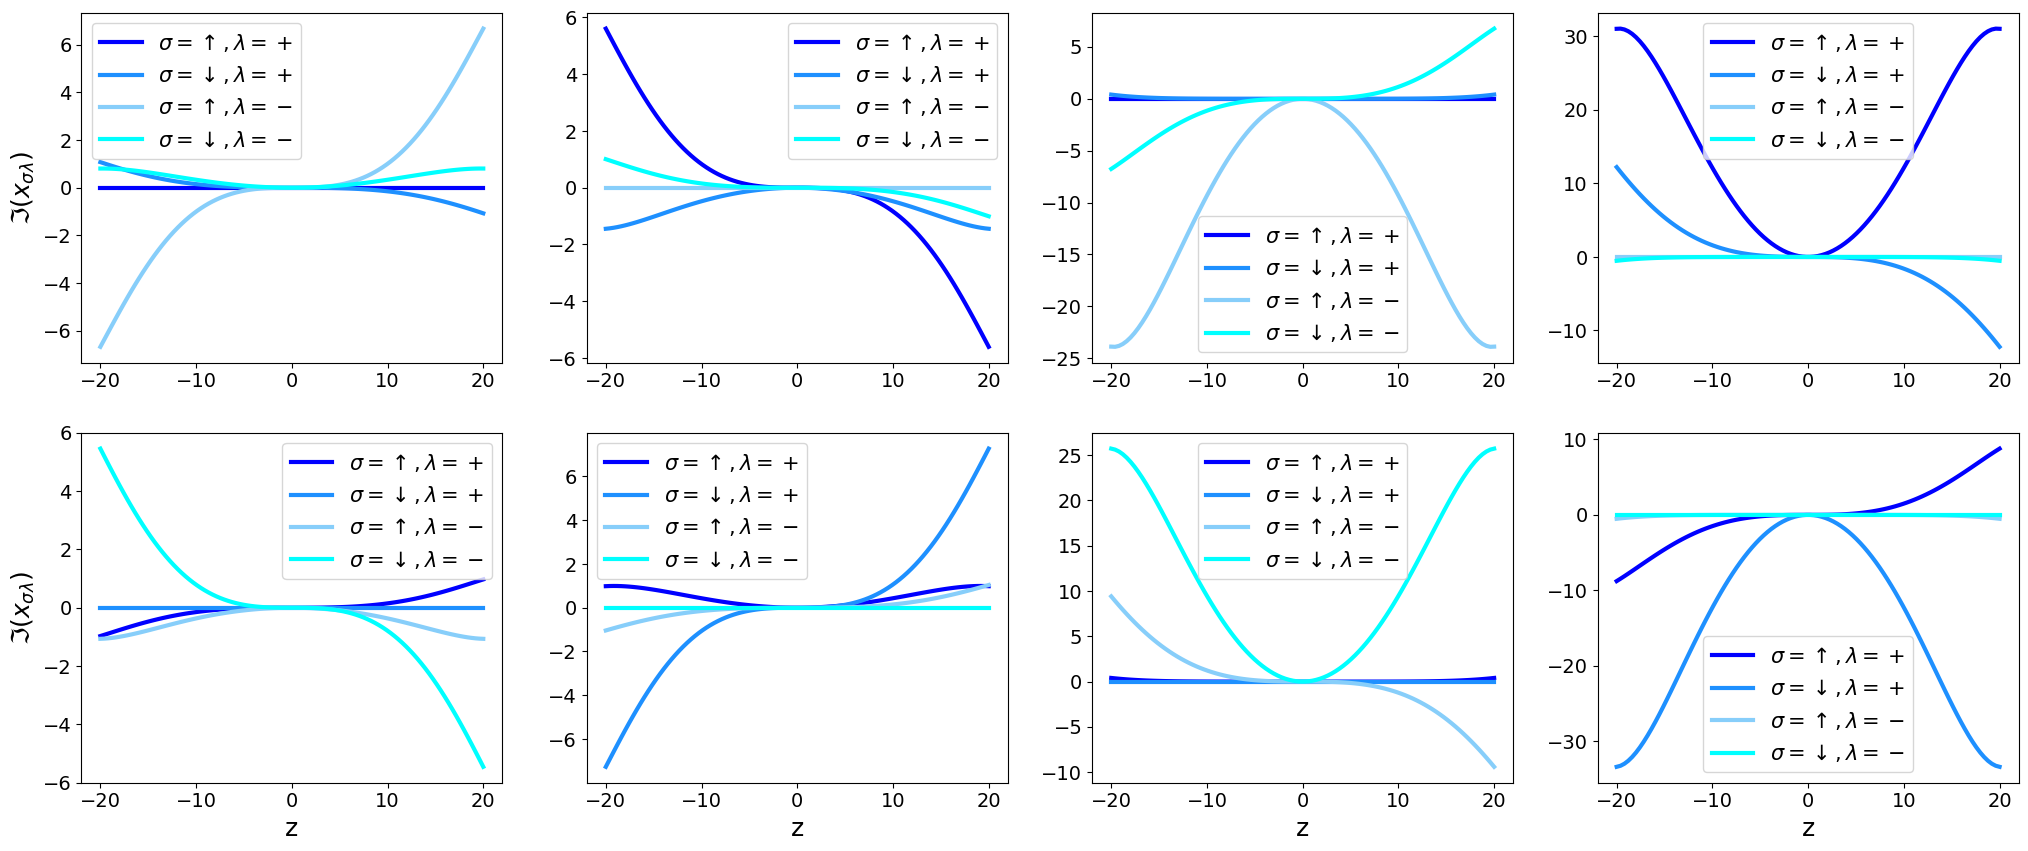

In [4]:
# colors 
c = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,4, figsize=(25, 10))

for i in range(2):
    for j in range(4):
        
        idx = 2*j + i
        
        axs[i][j].plot(Z, [expMz(z, kx=0.01, ky=0.02, L=0.03, w=0.01)[0][idx].imag for z in Z], c=c[0], label='$\sigma=\\uparrow, \lambda=+$', lw=3)
        axs[i][j].plot(Z, [expMz(z, kx=0.01, ky=0.02, L=0.03, w=0.01)[1][idx].imag for z in Z], c=c[1], label='$\sigma=\downarrow , \lambda=+$', lw=3)
        axs[i][j].plot(Z, [expMz(z, kx=0.01, ky=0.02, L=0.03, w=0.01)[2][idx].imag for z in Z], c=c[2], label='$\sigma=\\uparrow, \lambda=-$', lw=3)
        axs[i][j].plot(Z, [expMz(z, kx=0.01, ky=0.02, L=0.03, w=0.01)[3][idx].imag for z in Z], c=c[3], label='$\sigma=\downarrow , \lambda=-$', lw=3)

        if i == 1:
            axs[i][j].set_xlabel('z', fontsize = 18)

        if j == 0: 
            axs[i][j].set_ylabel('$\Im (x_{\sigma\lambda})$', fontsize = 18)
            
        axs[i][j].tick_params(axis='both', which='major', labelsize=14)        
        axs[i][j].legend(fontsize=15);

## **Particular Solution**
Given the general solution, we can find the particular solution to the non-homogeneous system of equations.
Firstly, we can notice that the Dirac delta in the right-hand side is proportional to the identity, and thus the non-homogeneous term is given explicitly by
$$
\begin{bmatrix}
    \hbar \delta(z-z') & 0 & 0 & 0 \\[5pt]
    %
    0 & \hbar \delta(z-z') & 0 & 0 \\[5pt]
    %
    0 & 0 & \hbar \delta(z-z') & 0 \\[5pt]
    %
    0 & 0 & 0 & \hbar \delta(z-z')
\end{bmatrix}  \,.
$$
Therefore, the 4 system of equations (having as unknowns the components of each of the 4 columns of the matrix $\mathcal{G}^{(0)}$)
are different and must be treated separately.
We discuss in detail the case of the first column, the others follow in the same way.

#### First Column 

The system of equations corresponding to the first column can be obtained by selecting $\sigma'=\uparrow$ and $\lambda'=+$.
Using the above notation, the 4 unknowns are
$$
	x_1 \equiv g_{\uparrow +, \, \uparrow +} \,,
	\qquad
	x_2 \equiv g_{\downarrow +, \, \uparrow +} \,,
	\qquad
 	x_3 \equiv g_{\uparrow -, \, \uparrow +} \,,
	\qquad
	x_4 \equiv g_{\downarrow -, \, \uparrow +} \,,
$$
and adding the non-homogeneous term, the equations are explicitly given by
$$
	\begin{split}
		-(B_1-D_1) \partial_z^2 x_1 - (\epsilon_0 + \mu_0 + \Lambda - \hbar\omega) x_1 - A_2 k_- x_4 + i A_1 \partial_z x_3 &= \hbar \delta(z-z') \,, \\[5pt]
		%
		-(B_1-D_1) \partial_z^2 x_2 - (\epsilon_0 + \mu_0 - \Lambda - \hbar\omega) x_2 - A_2 k_+ x_3 - i A_1 \partial_z x_4 &= 0 \,, \\[5pt]
		%
		(B_1+D_1) \partial_z^2 x_3 - (\epsilon_0 - \mu_0 + \Lambda - \hbar\omega) x_3 - A_2 k_- x_2 + i A_1 \partial_z x_1 &= 0 \,, \\[5pt]
		%
		(B_1+D_1) \partial_z^2 x_4 - (\epsilon_0 - \mu_0 - \Lambda - \hbar\omega) x_4 - A_2 k_+ x_1 - i A_1 \partial_z x_2 &= 0 \,.
	\end{split}
$$

To solve this system, we proceed by steps.


---
- i. **Homogeneous solution** \
  We first select $z \neq z'$ such that $\delta(z-z')=0$, and we end up with a homogeneous system whose solution is already known.
  In principle, the solution for $z < z'$ and $z > z'$ are different, and hence we can write the general solution as
  $$
  \mathbf{X} = 
  \begin{cases}
      e^{\mathbb{M}z} \, \mathbf{X}_0^L & \quad z<z' \,, \\[5pt]
      %
      e^{\mathbb{M}z} \, \mathbf{X}_0^R & \quad z>z' \,,
  \end{cases}
  $$
  where $\mathbf{X}_0^L = (l_1, \dots l_8)^T$ and $\mathbf{X}_0^R = (r_1, \dots r_8)^T$.
  If we denote the elements of the exponential matrix $e^{\mathbb{M}z}$ as $M_{ij}$, the general solution for the _components_ of the Green's function can be written as
  $$
   x_i^L(z,z') = \sum_{j=1}^8 M_{ij}(z) \, l_j(z') \,,
   \qquad
   x_i^R(z,z') = \sum_{j=1}^8 M_{ij}(z) \, r_j(z') \,,
  $$
  for $i \in \{ 1,2,3,4 \}$. The remaining components of the vector $\mathbf{X}_{L,R}$ are the _first derivative_ of the Green's function which have a similar form
  $$
   \partial_z x_i^L(z,z') = \sum_{j=1}^8 M_{ij}(z) \, l_j(z') \,,
   \qquad
   \partial_z x_i^R(z,z') = \sum_{j=1}^8 M_{ij}(z) \, r_j(z') \,,
  $$
  with $i \in \{ 1,2,3,4 \}$.
  This explicit representation will be useful in the following.


---
- ii. **Boundary Conditions** \
  We apply the boundary conditions. We assume that the spatial derivative of the unperturbed Green's function vanishes at the two interfaces of the MTI, which can be found at $z=0$ and $z=d$.
  The condition at $z=0$ implies $z'>z$ and thus apply to the left solution:
  $$
    \partial_z x_i^L(z=0,z') = \sum_{j=1}^8 M_{i+4, j}(z=0) \, l_j(z') = 0 \,, \qquad \text{for} \quad i \in \{ 1,2,3,4 \} \,.
  $$
  Similarly, the condition at $z=d$ implies $z'<z$ and thus apply to the right solution
  $$
    \partial_z x_i^R(z=d,z') = \sum_{j=1}^8 M_{i+4, j}(z=d) \, r_j(z') = 0 \,, \qquad \text{for} \quad i \in \{ 1,2,3,4 \} \,.
  $$
  The two boundary conditions above constitute 8 equations into the 16 unknowns $\left( l_1, \dots l_8, r_1, \dots r_8 \right)$.


---
- iii. **Continuity** \
  We assume continuity of the Green's function at $z=z'$. This condition can be written as $x_i^L(z=z',z') - x_i^R(z=z',z') = 0$ and explicitly yields the following equations
  $$
  \sum_{j=1}^8 M_{ij}(z=z') \, l_j(z') - \sum_{j=1}^8 M_{ij}(z=z') \, r_j(z') = 0 \,, \qquad \text{for} \quad i \in \{ 1,2,3,4 \} \,.
  $$
  The continuity condition provides 4 equations into the 16 unknowns $\left( l_1, \dots l_8, r_1, \dots r_8 \right)$.


---
- iv. **First Derivative Discontinuity** \
  The last condition is the discontinuity of the first derivative at $z=z'$.
  If we integrate the first equation in a small range around $z=z'$ we have
  $$
  -\int_{z'-\epsilon}^{z'+\epsilon} dz \, (B_1-D_1) \partial_z^2 x_1
  +
  i\int_{z'-\epsilon}^{z'+\epsilon} dz \,  A_1 \partial_z x_3 
  -
  \int_{z'-\epsilon}^{z'+\epsilon} dz \, \Bigl\lbrack (\epsilon_0 + \mu_0 + \Lambda - \hbar\omega) x_1 + A_2 k_- x_4 \Bigr\rbrack
  =
  \hbar \int_{z'-\epsilon}^{z'+\epsilon} dz \, \delta(z-z') \,.
  $$
  The right-hand side becomes straightforwardly
  $$
  \hbar \int_{z'-\epsilon}^{z'+\epsilon} dz \, \delta(z-z') = \hbar \,,
  $$
  and if the Green's function is finite in the range $\lbrack z'-\epsilon ; z'+\epsilon \rbrack$, we have that 
  $$
  \lim_{\epsilon \rightarrow 0} \int_{z'-\epsilon}^{z'+\epsilon} dz \, \Bigl\lbrack (\epsilon_0 + \mu_0 + \Lambda - \hbar\omega) x_1 + A_2 k_- x_4 \Bigr\rbrack = 0 \,.
  $$
  The first derivative also vanishes
  $$
  i \lim_{\epsilon \rightarrow 0} \int_{z'-\epsilon}^{z'+\epsilon} dz \,  A_1 \partial_z x_3
  =
  i \lim_{\epsilon \rightarrow 0} \Bigl\lbrack A_1 x_3(z'+\epsilon,z') - A_1 x_3(z'-\epsilon,z') \Bigr\rbrack = 0 \,,
  $$
  since we assumed that the Green's function is *continuous*.
  Finally, the second derivative can be evaluated as
  $$
  -\lim_{\epsilon \rightarrow 0} \int_{z'-\epsilon}^{z'+\epsilon} dz \,  (B_1-D_1) \partial_z^2 x_1
  =
  -\lim_{\epsilon \rightarrow 0} (B_1-D_1) \Bigl\lbrack \partial_z x_1 (z'+\epsilon,z') - \partial_z x_1 (z'-\epsilon,z') \Bigr\rbrack \,,
  $$
  and therefore we get the following condition on the first derivative of $x_1$
  $$
  \lim_{\epsilon \rightarrow 0} \Bigl\lbrack \partial_z x_1 (z'-\epsilon,z') - \partial_z x_1 (z'+\epsilon,z') \Bigr\rbrack = \frac{\hbar}{(B_1-D_1)} \,.
  $$
  The other equations can be treated in the same way but since they are homogeneous, the first derivative of the remaining components $x_{2,3,4}$ are continuous at $z=z'$
  $$
  \lim_{\epsilon \rightarrow 0} \Bigl\lbrack \partial_z x_i (z'-\epsilon,z') - \partial_z x_i (z'+\epsilon,z') \Bigr\rbrack = 
 0 \,,
 \qquad \text{for} \quad i \in \{ 2,3,4 \}  \,.
  $$
  These conditions on the first derivatives can be written explicitly for the functions $l_j$ and $r_j$ as
  $$
  \begin{gathered}
      \sum_{j=1}^8 M_{Ij}(z=z') \, l_j(z')
      -
      \sum_{j=1}^8 M_{Ij}(z=z') \, r_j(z')
      = 0 \,, \\[5pt]
      %%%
      \sum_{j=1}^8 M_{5j}(z=z') \, l_j(z')
      -
      \sum_{j=1}^8 M_{5j}(z=z') \, r_j(z')
      =
      \frac{\hbar}{(B_1-D_1)} \,, 
  \end{gathered}
  $$
  where the first equation holds for $ I \in \{ 6,7,8 \}$.
  This last condition on the first derivative provide the last 4 equations that we need to solve the system of equations.

#### **Full Solution** </font> 

The 16 equations for the 16 unknowns $l_j$ and $r_j$ for each of the 4 columns of the matrix $\mathcal{G}^{(0)}$ can be written in matrix form in the following way
$$
\begin{gathered}
    M_{I1}(z=0) \, \textcolor{blue}{l_1}(z') + \dots + M_{I8}(z=0) \, \textcolor{blue}{l_8}(z') = 0 \,, \\[7.5pt]
    %
    M_{I1}(z=d) \, \textcolor{red}{r_1}(z') + \dots + M_{I8}(z=d) \, \textcolor{red}{r_8}(z') = 0 \,, \\[7.5pt] 
    %%%
    M_{i1}(z=z') \, \textcolor{blue}{l_1}(z') + \dots + M_{i8}(z=z') \, \textcolor{blue}{l_8}(z')
    -
    M_{i1}(z=z') \, \textcolor{red}{r_1}(z') - \dots - M_{i8}(z=z') \, \textcolor{red}{r_8}(z') = 0 \,, \\[7.5pt]
    %%%
    M_{51}(z=z') \, \textcolor{blue}{l_1}(z') + \dots + M_{58}(z=z') \, \textcolor{blue}{l_8}(z')    
    -
    M_{51}(z=z') \, \textcolor{red}{r_1}(z') - \dots - M_{58}(z=z') \, \textcolor{red}{r_8}(z')
    =
    \frac{\hbar}{(B_1-D_1)} \,, \\[7.5pt]
    %
    M_{J1}(z=z') \, \textcolor{blue}{l_1}(z') + \dots + M_{J8}(z=z') \, \textcolor{blue}{l_8}(z')    
    -
    M_{J1}(z=z') \, \textcolor{red}{r_1}(z') - \dots - M_{J8}(z=z') \, \textcolor{red}{r_8}(z')
    = 0 \,, \\[5pt]
\end{gathered}
$$
where $I \in \{ 5,6,7,8 \}$ and $J \in \{ 6,7,8 \}$.
By defining the vector of unknowns
$$
 \mathbf{x} = 
 \begin{pmatrix}
     \textcolor{blue}{l_1} & \dots & \textcolor{blue}{l_8} &
     \textcolor{red}{r_1} & \dots & \textcolor{red}{r_8}
 \end{pmatrix}^T \,,
$$
the system can be expressed in matrix form as 
$$
 \mathbb{A} \mathbf{x} = \mathbf{y} \,,
$$
where the matrix $\mathbb{A}$ is given by 
$$
 \mathbb{A} =
 \begin{bmatrix}
    M_{I1}(z=0) & \dots & M_{I8}(z=0) & 0 & \dots & 0 \\[5pt]
    %
    0 & \dots & 0 & M_{I1}(z=d) & \dots & M_{I8}(z=d) & \\[5pt]
    %%%
    M_{i1}(z=z') & \dots & M_{i8}(z=z') & -M_{i1}(z=z') & \dots & -M_{i8}(z=z') \\[5pt]
    %%%
    M_{I1}(z=z') & \dots & M_{I8}(z=z') & -M_{I1}(z=z') & \dots & -M_{I8}(z=z') \\[5pt]
 \end{bmatrix} \,,
$$
for $i \in \{ 1,2,3,4 \}$ and $I \in \{ 5,6,7,8 \}$.
The non-homogeneous term depend on the selected column $\mathbf{y} \equiv \mathbf{y}_{\sigma'\lambda'}$.
For the case $\sigma'\lambda'=\uparrow+$ discussed above (first column)  we have
$$
    \mathbf{y}_{\uparrow+} = 
    \begin{pmatrix}
        0 & \dots & 0 &
        \frac{\hbar}{(B_1-D_1)} & 0 & 0 & 0 
    \end{pmatrix}^T \,,
$$
but this result can be easily generalized to all the other columsn in the following way
$$
\begin{split}
    \mathbf{y}_{\downarrow+} &= 
    \begin{pmatrix}
        0 & \dots & 0 &
        0 & \frac{\hbar}{(B_1-D_1)} & 0 & 0  
    \end{pmatrix}^T \,,  \\[5pt]
    %
    \mathbf{y}_{\uparrow-} &= 
    \begin{pmatrix}
        0 & \dots & 0 &
        0 & 0 & -\frac{\hbar}{(B_1+D_1)} & 0 
    \end{pmatrix}^T \,, \\[5pt]
    %
    \mathbf{y}_{\downarrow-} &= 
    \begin{pmatrix}
        0 & \dots & 0 &
        0 & 0 & 0 & -\frac{\hbar}{(B_1+D_1)}
    \end{pmatrix}^T  \,. \\[5pt]
\end{split}
$$

In [5]:
# Function defining the matrix A (Z=z', d=thickness)
def Amat(d, Z, kx, ky, L, w, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar = 1.):

    # exponential at z=0
    eM0 = expMz(0, kx, ky, L, w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # exponential at z=d
    eMd = expMz(d, kx, ky, L, w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)

    # exponential at z=Z
    eMZ = expMz(Z, kx, ky, L, w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)

    # initialize an empty matrix
    A = np.empty([16, 16], dtype=complex)

    # fill in the matrix A
    for i in range(4):
        for j in range(8):

            # boundary conditions z=0
            A[i][j] = eM0[i+4][j]
            A[i][j+8] = 0

            # boundary conditions z=d
            A[i+4][j] = 0
            A[i+4][j+8] = eMd[i+4][j]

            # continuity condition z=z'
            A[i+8][j] = eMZ[i][j]
            A[i+8][j+8] = -eMZ[i][j]

            # derivative jump at z=z'
            A[i+12][j] = eMZ[i+4][j]
            A[i+12][j+8] = -eMZ[i+4][j]

    return A
    


# Function defining the non-homogeneous term y
def Yvec(icol, D1 = 1.3, B1 = 10, hbar = 1.):

    # initialize an empty vector
    y = np.zeros([16], dtype=complex)

    # fill in the nonzero value
    match icol:
    
        # column 1,2
        case 1 | 2:
            y[11+icol] = hbar/(B1-D1)
            
        # column 3,4
        case 3 | 4:
            y[11+icol] = -hbar/(B1+D1)

    return(y)



# Function for solving the system and finding the particular solution
def psolution(icol, d, Z, kx, ky, L, w, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1.):

    # vetcor y 
    y = Yvec(icol, B1=B1, D1=D1, hbar=hbar)
    
    # matrix A
    A = Amat(d, Z, kx, ky, L, w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)

    return np.linalg.solve(A, y)

psolution(icol=0, d=100., Z=35, kx=0., ky=0., L=0., w=0.0025);

## <font> **Green's Function** </font> 


So far we computed the following quantities:

- the *general solutions* $x_{\sigma\lambda}$ and their first derivatives $\partial_z x_{\sigma\lambda}$ in terms of the elements of the matrix $e^{\mathbb{M}z}$;

- the *particular solutions* to the non-homogeneous differential equations, yielding the coefficients $l_j$ and $r_j$ which satisfy boundary conditions and continuity of the Green's function.

We can now evaluate the unperturbed MTI Green's function matrix $\mathcal{G}^{(0)}_{MTI}$.
Recalling that the dependence on $\sigma'\lambda'$ is contained only within the functions $l_j \equiv l_j^{\sigma'\lambda'}$ and $r_j \equiv r_j^{\sigma'\lambda'}$, all the Green's function components can be expressed as
$$
    g_i^{\sigma'\lambda'}(z,z';\omega)
    =
    \sum_{j=1}^8 M_{ij}(z) \, c_j^{\sigma'\lambda'}(z') \,,
$$
where $g_i^{\sigma'\lambda'} \equiv g_{\sigma\lambda, \sigma'\lambda'}$, the functions $c_j \equiv c_j^{\sigma'\lambda'}(z')$ are given by
$$ 
    c_j^{\sigma'\lambda'}(z') = 
    \begin{cases}
        \textcolor{blue}{l_j}^{\sigma'\lambda'}(z') & \text{if} \quad z<z' \,, \\[10pt]
        %
        \textcolor{red}{r_j}^{\sigma'\lambda'}(z') & \text{if} \quad z>z' \,,
    \end{cases}
$$
and the four possible states $\sigma\lambda \in \{ \uparrow +, \downarrow +, \uparrow -, \downarrow - \}$ are labelled by the index $i \in \{ 1,2,3,4 \}$ which also denotes the corresponding row of the exponential matrix $e^{\mathbb{M}z}$.


In [6]:
# Function evaluating the Green's function (Z=z', d=thickness)
def GF(d, z, Z, kx, ky, L, w, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar = 1.):

    # empty matrix for Green's function
    G = np.empty([4, 4], dtype='complex')

    # general solution M_ij at z
    eMz = expMz(z=z, kx=kx, ky=ky, L=L, w=w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)

    # loop over columns (sigma',lambda')
    for icol in range(4):
        
        # particular solutions c_j
        cj = psolution(icol=icol+1, d=d, Z=Z, kx=kx, ky=ky, L=L, w=w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
        
        # select left or right depending on z,z'
        cj = cj[:8] if z<Z else cj[8:]

        # loop over the 4 sigma,lambda states i=1,2,3,4
        for irow in range(4):
            
            # evaluate Green's function components 
            G[irow][icol] = np.sum( [eMz[irow][j]*cj[j] for j in range(8)] )
        
    return G

### <font> Green's Function for $z=z'$ </font> 
We plot here the Green's function $\mathcal{G}^{(0)}(z,z;\omega)$ as a function of the out-of-plane coordinate $z$ and with $z'=z$.

In [7]:
# parameters
d = 100.; kx = 0.; ky = 0.; L = 0.005
# z range
Z = np.linspace(0, d, 250)

# Green's function
gfzZ = np.array([GF(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=0.0025) for z in Z])

#### <font color='green'> **Real Part** </font> 

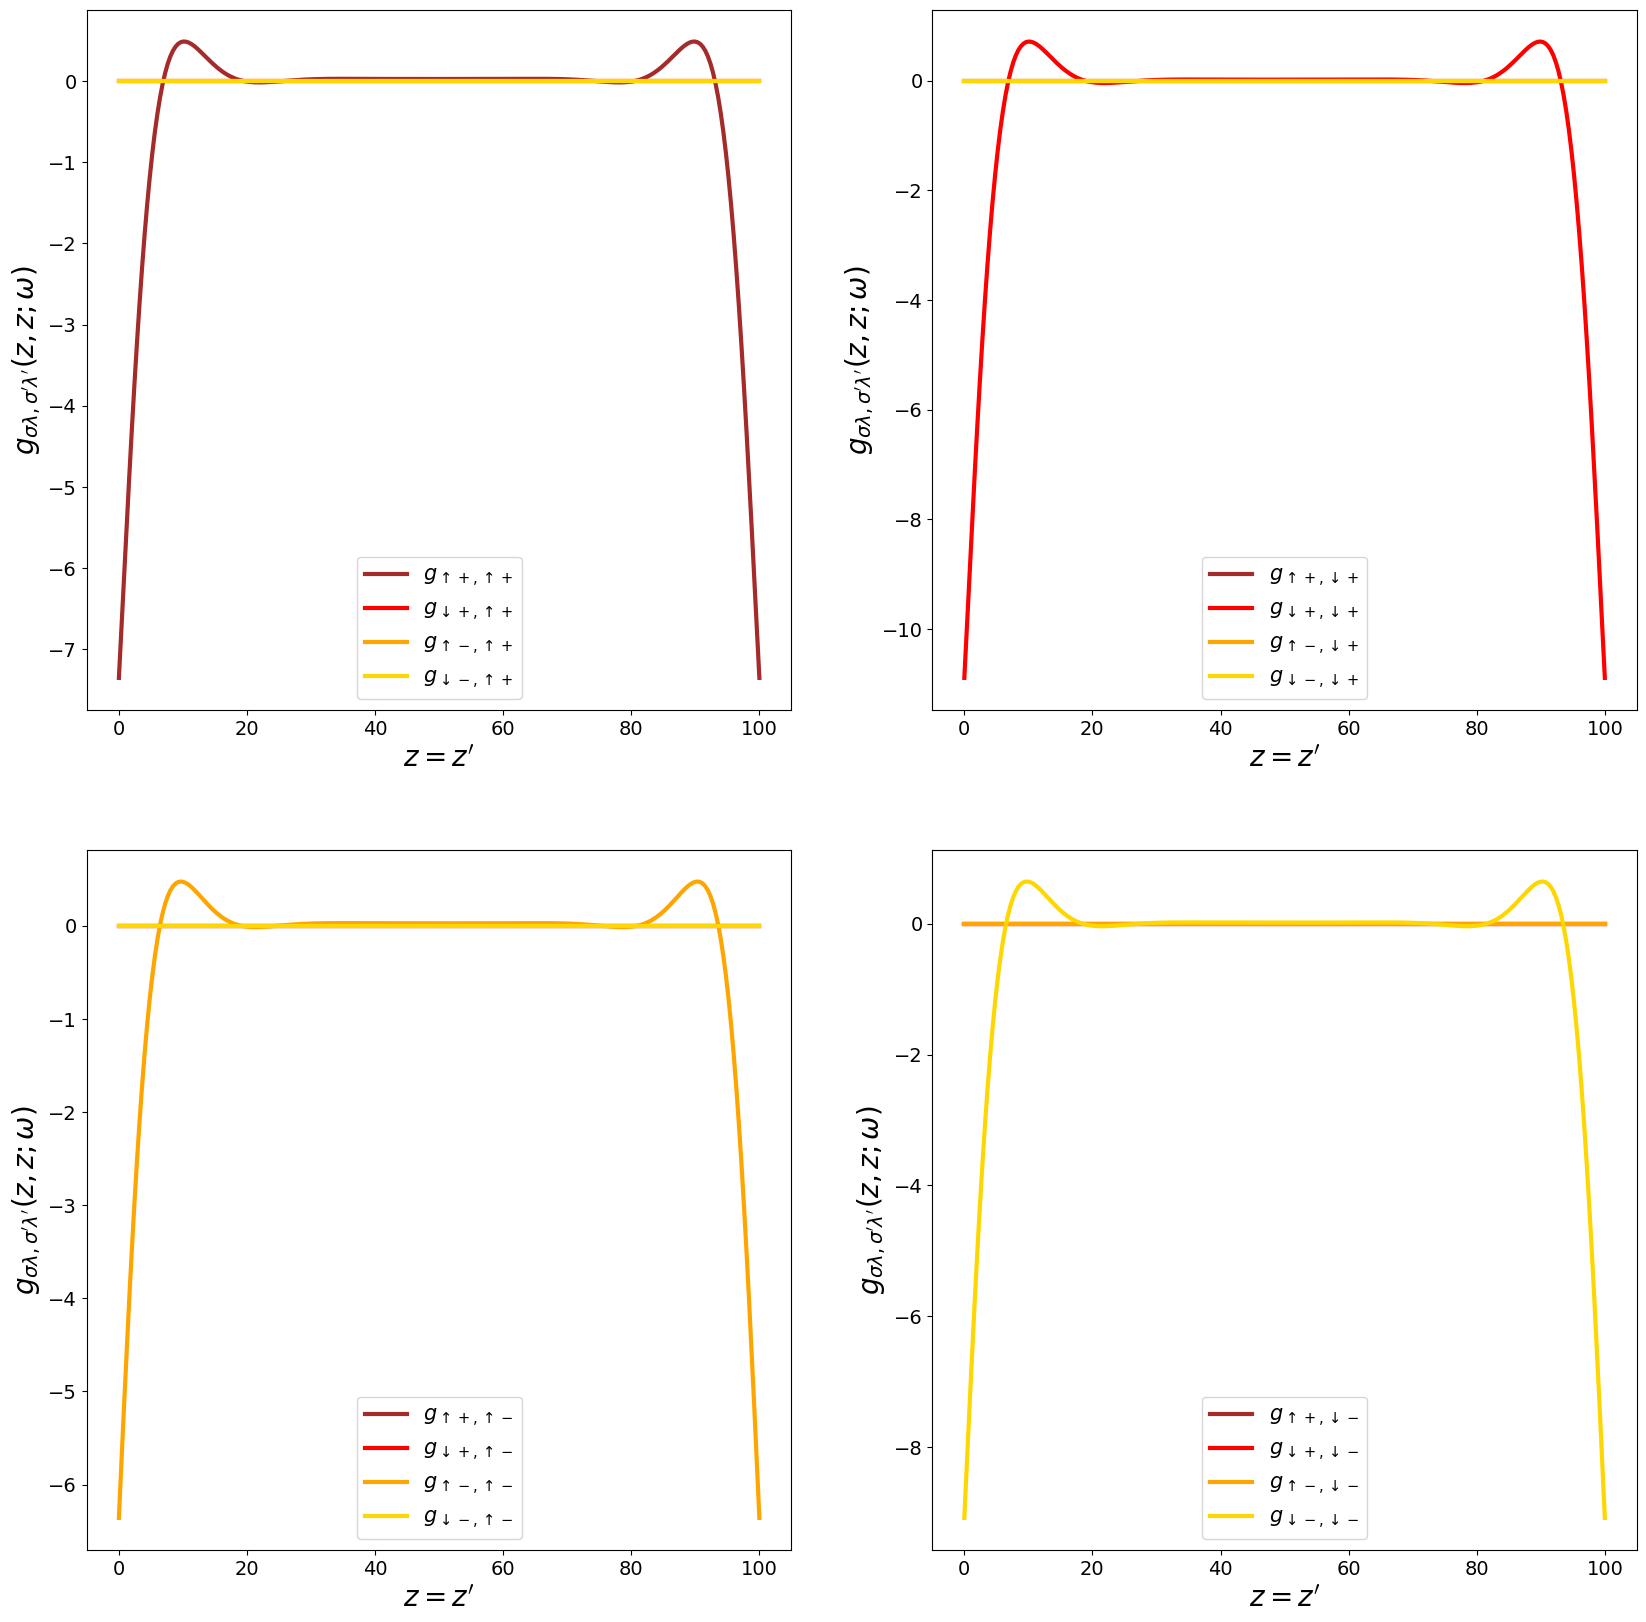

In [8]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfzZ[idx][irow][icol].real for idx in range(len(Z))], c=colors[irow], lw=3, label=labels[irow][icol])
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

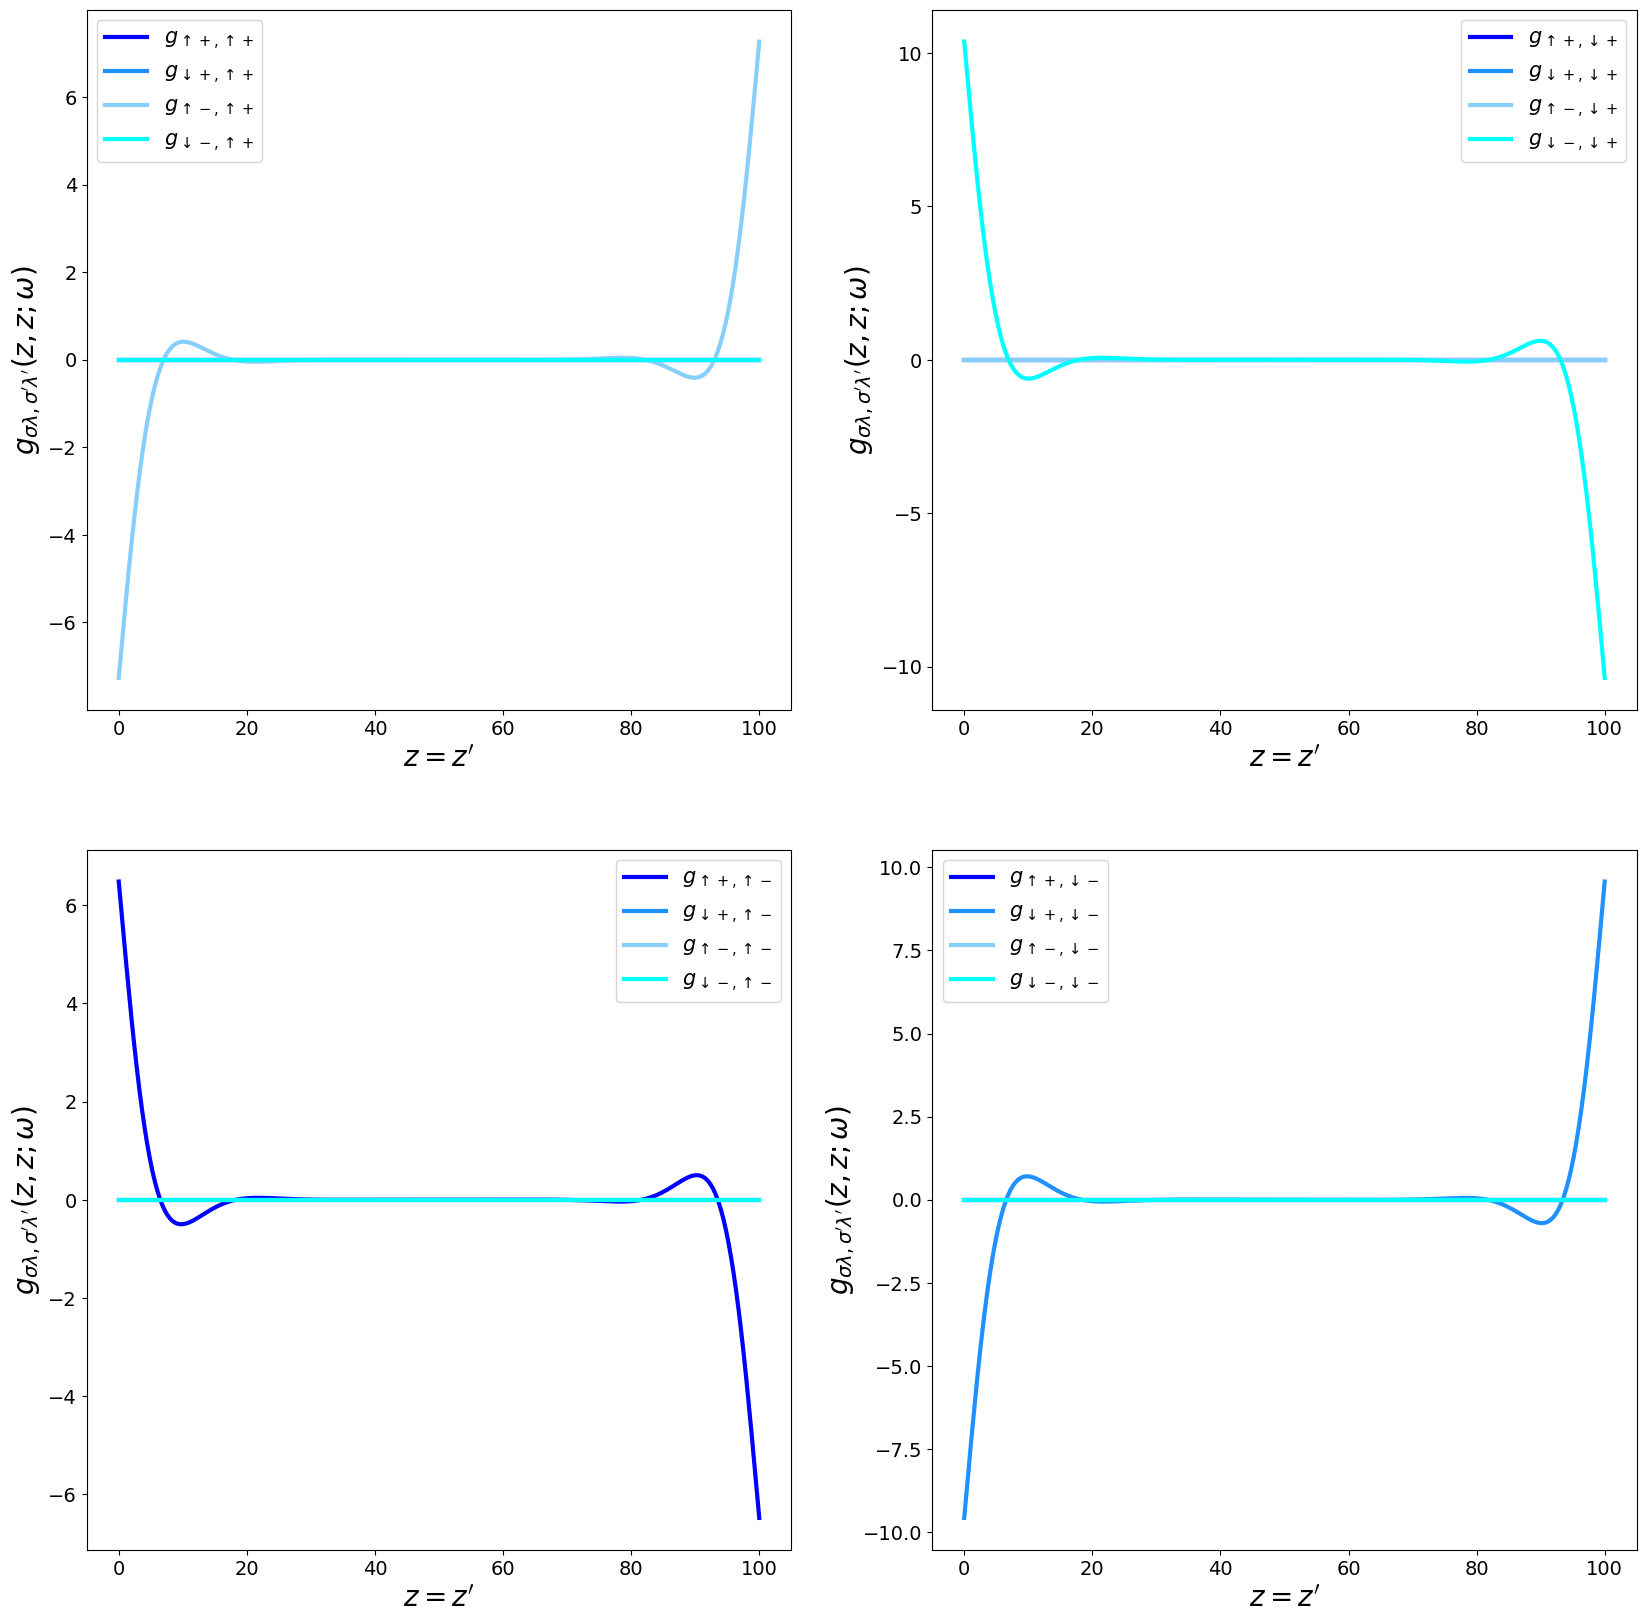

In [9]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        axs[iPic][jPic].plot(Z, [gfzZ[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=3, label=labels[irow][icol])

    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
            
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font> Green's Function versus $z$ </font> 
We plot here the Green's function $\mathcal{G}^{(0)}(z,z';\omega)$ as a function of the out-of-plane coordinate $z$ for a fixed $z'$.

In [36]:
# z' value
zp = 25; d=150
# z range
Z = np.linspace(0, d, 200)
# Green's function
gfz = np.array([GF(d=d, z=z, Z=zp, kx=0., ky=0., L=0.010, w=0.005) for z in Z])

gfzminus = np.array([GF(d=d, z=z, Z=zp, kx=0., ky=0., L=0.010, w=-0.005) for z in Z])

#### <font color='green'> **Real Part** </font> 

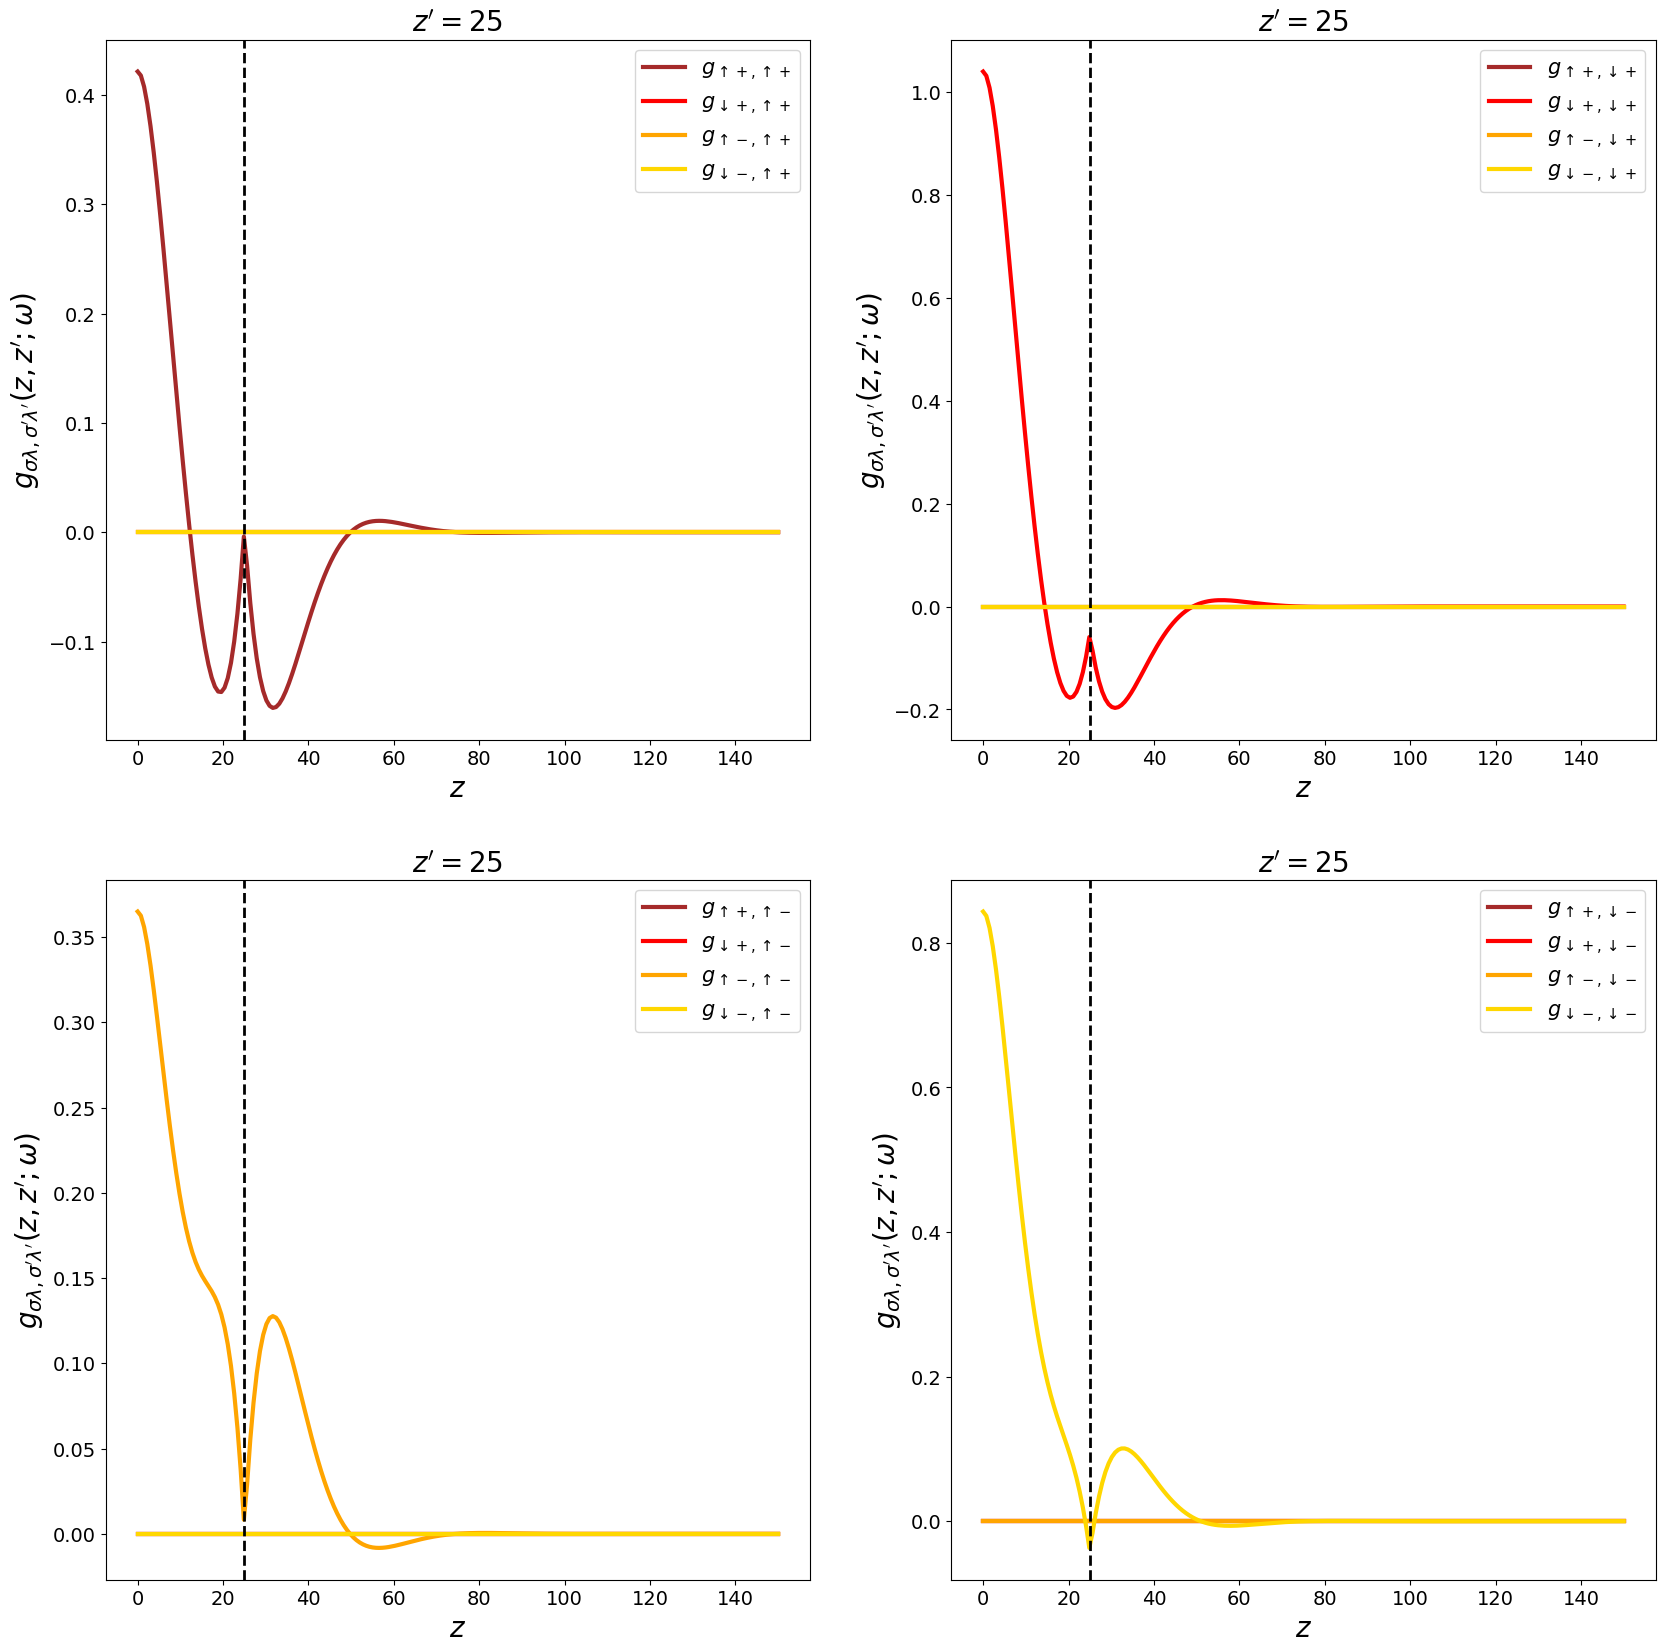

In [37]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfz[idx][irow][icol].real for idx in range(len(Z))], c=colors[irow], lw=3, label=labels[irow][icol])

    axs[iPic][jPic].axvline(x=zp, c='black', lw=2, ls='--')

    axs[iPic][jPic].set_title('$z\' = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_xlabel('$z$', fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
            
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)

#### <font color='green'> **Imaginary Part** </font> 

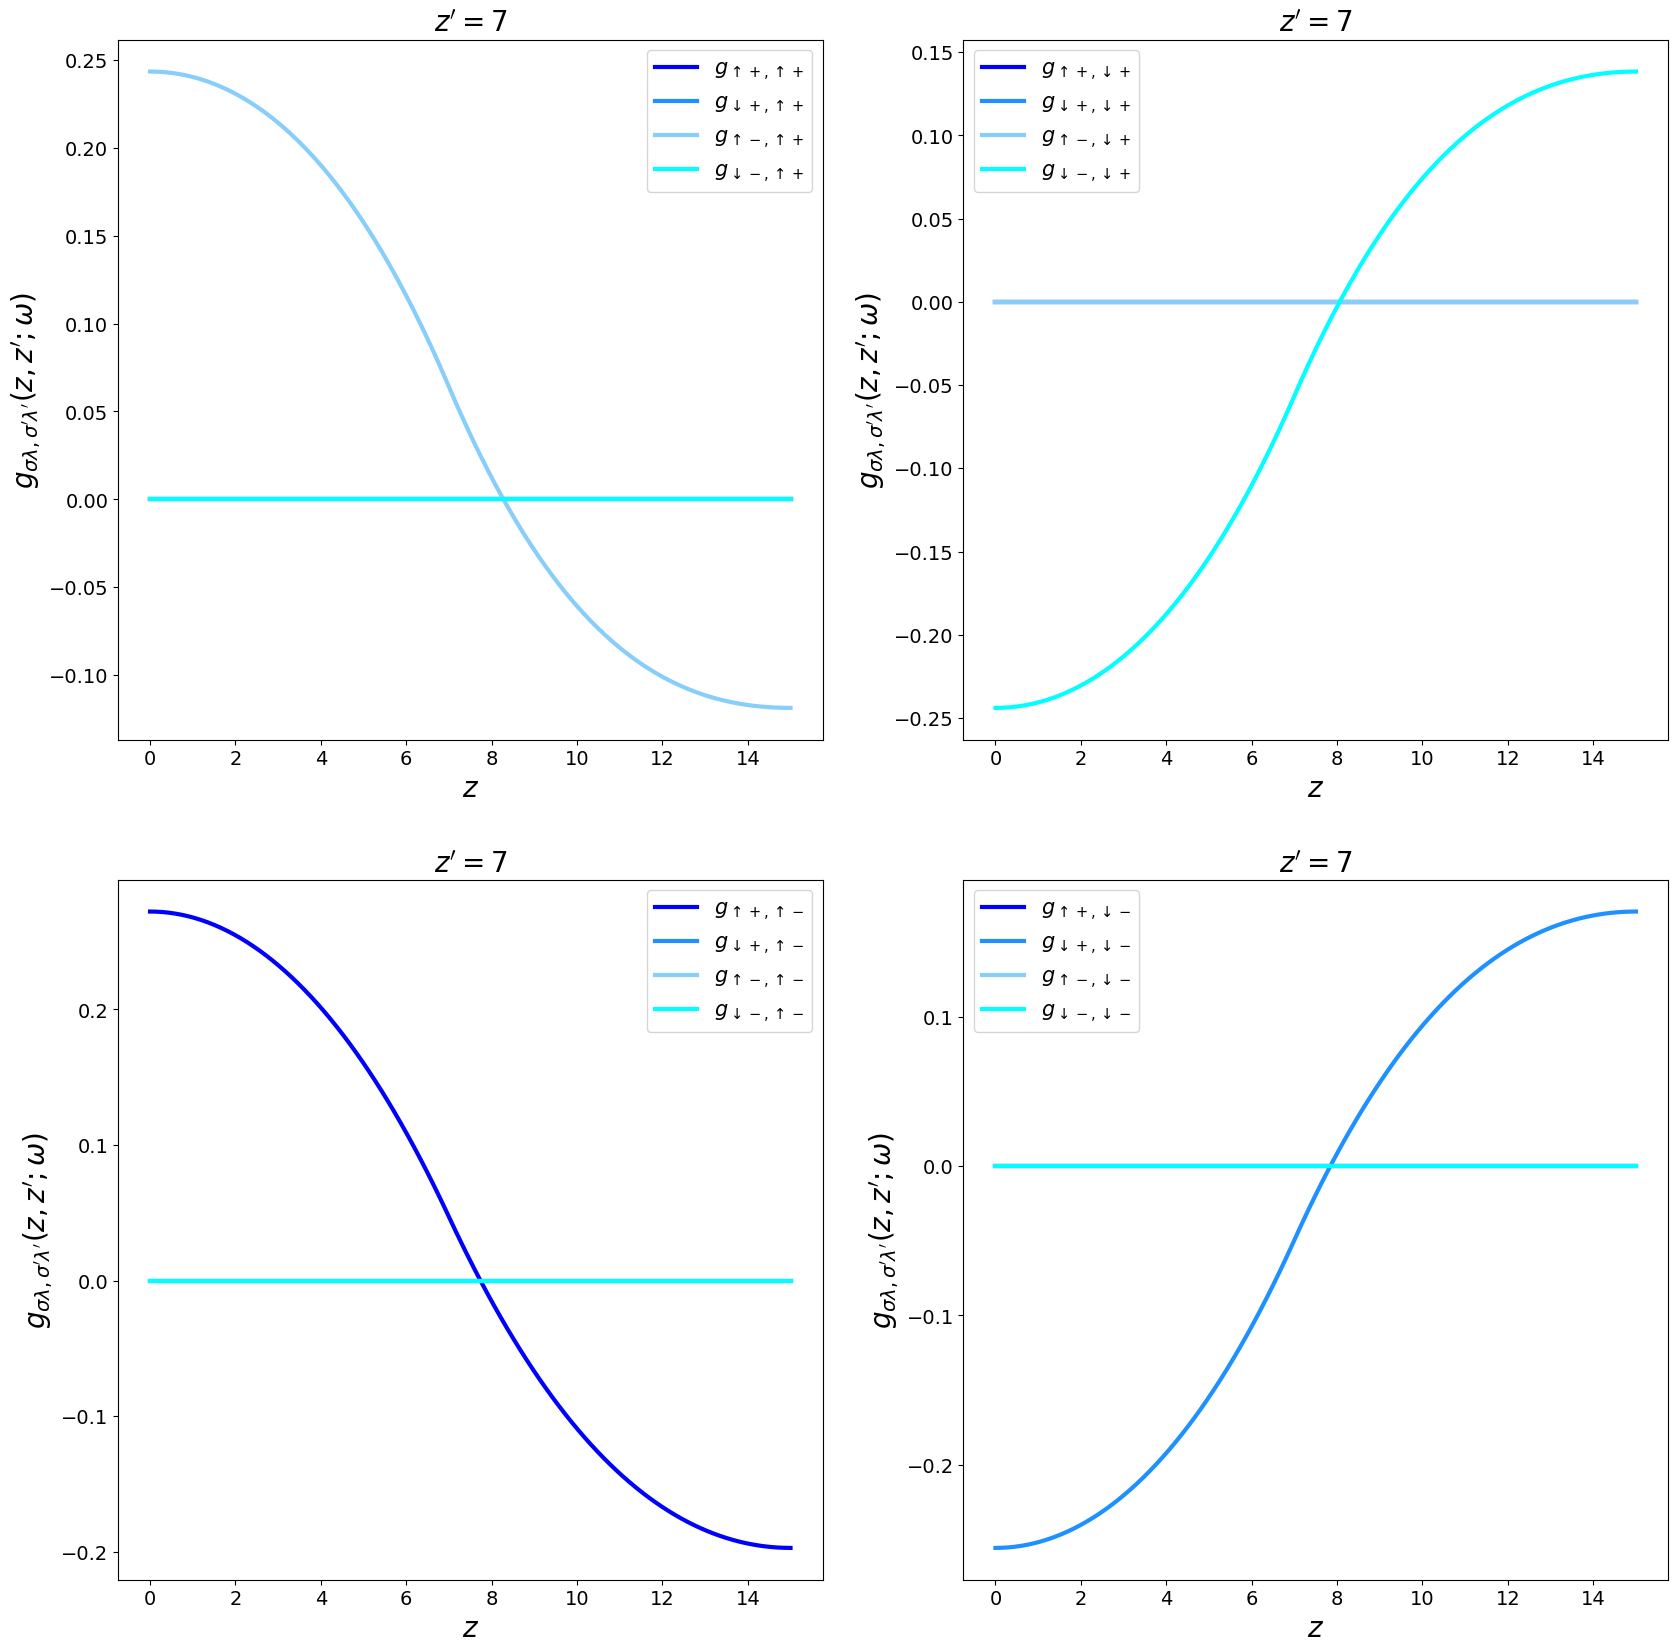

In [14]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfz[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=3, label=labels[irow][icol])
    
    axs[iPic][jPic].set_title('$z\' = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_xlabel('$z$', fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
            
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font> Green's Function versus $z'$ </font> 
We plot here the Green's function $\mathcal{G}^{(0)}(z,z';\omega)$ as a function of the out-of-plane coordinate $z'$ for a fixed $z$.

In [13]:
# z value
zp = 50
# z' range
Z = np.linspace(0, 100., 100)
# Green's function
gfZ = np.array([GF(d=100., z=zp, Z=z, kx=0., ky=0., L=0.010, w=0.001) for z in Z])

#### <font color='green'> **Real Part** </font> 

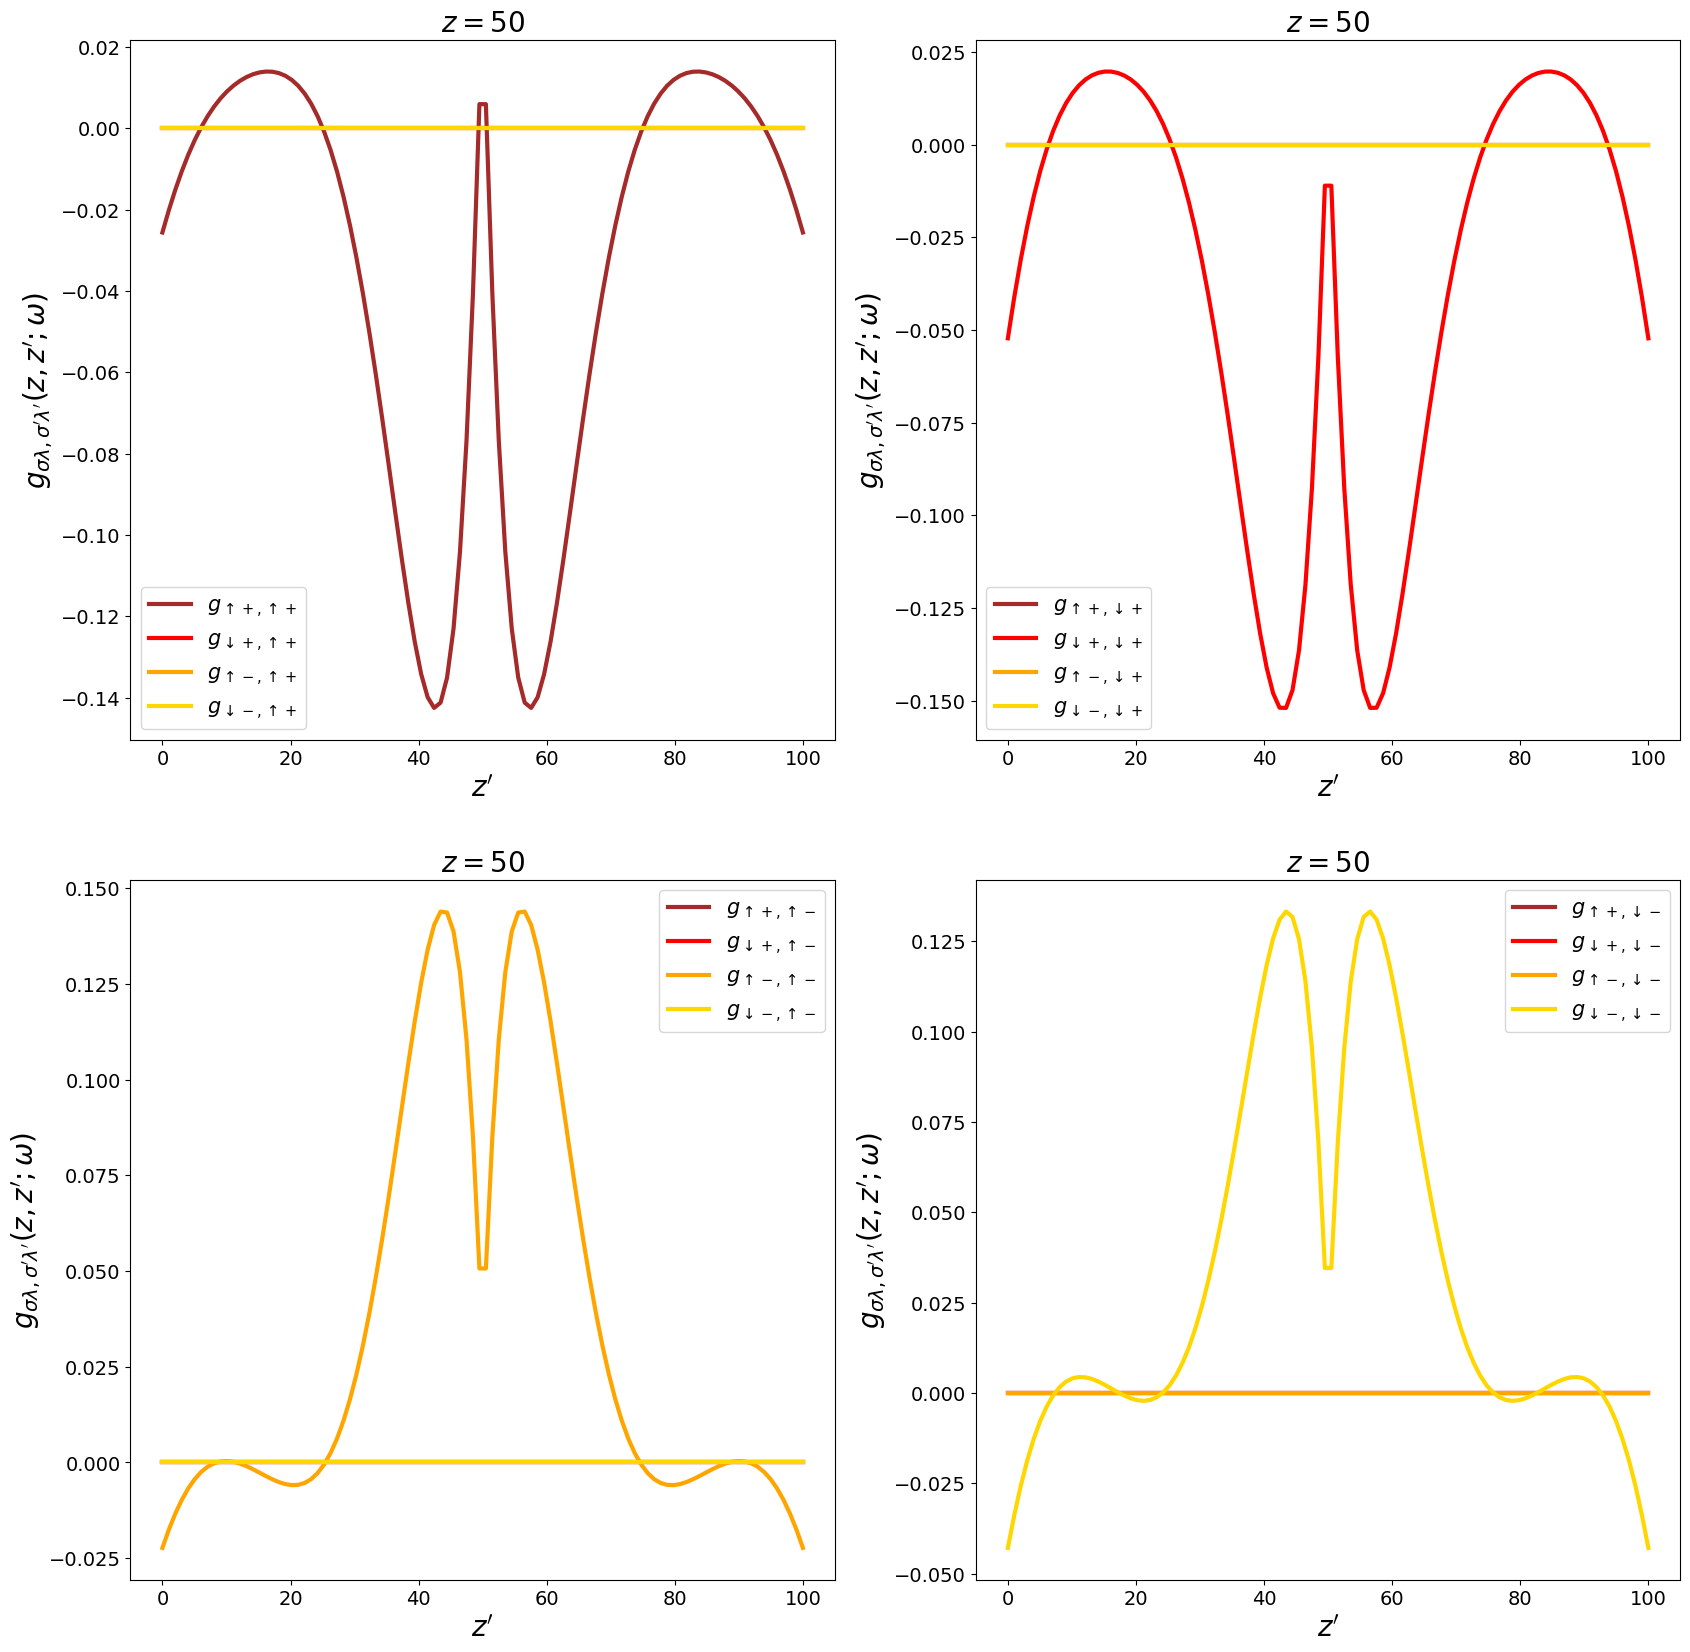

In [14]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfZ[idx][irow][icol].real for idx in range(len(Z))], c=colors[irow], lw=3, label=labels[irow][icol])
    
    axs[iPic][jPic].set_title('$z = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
            
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

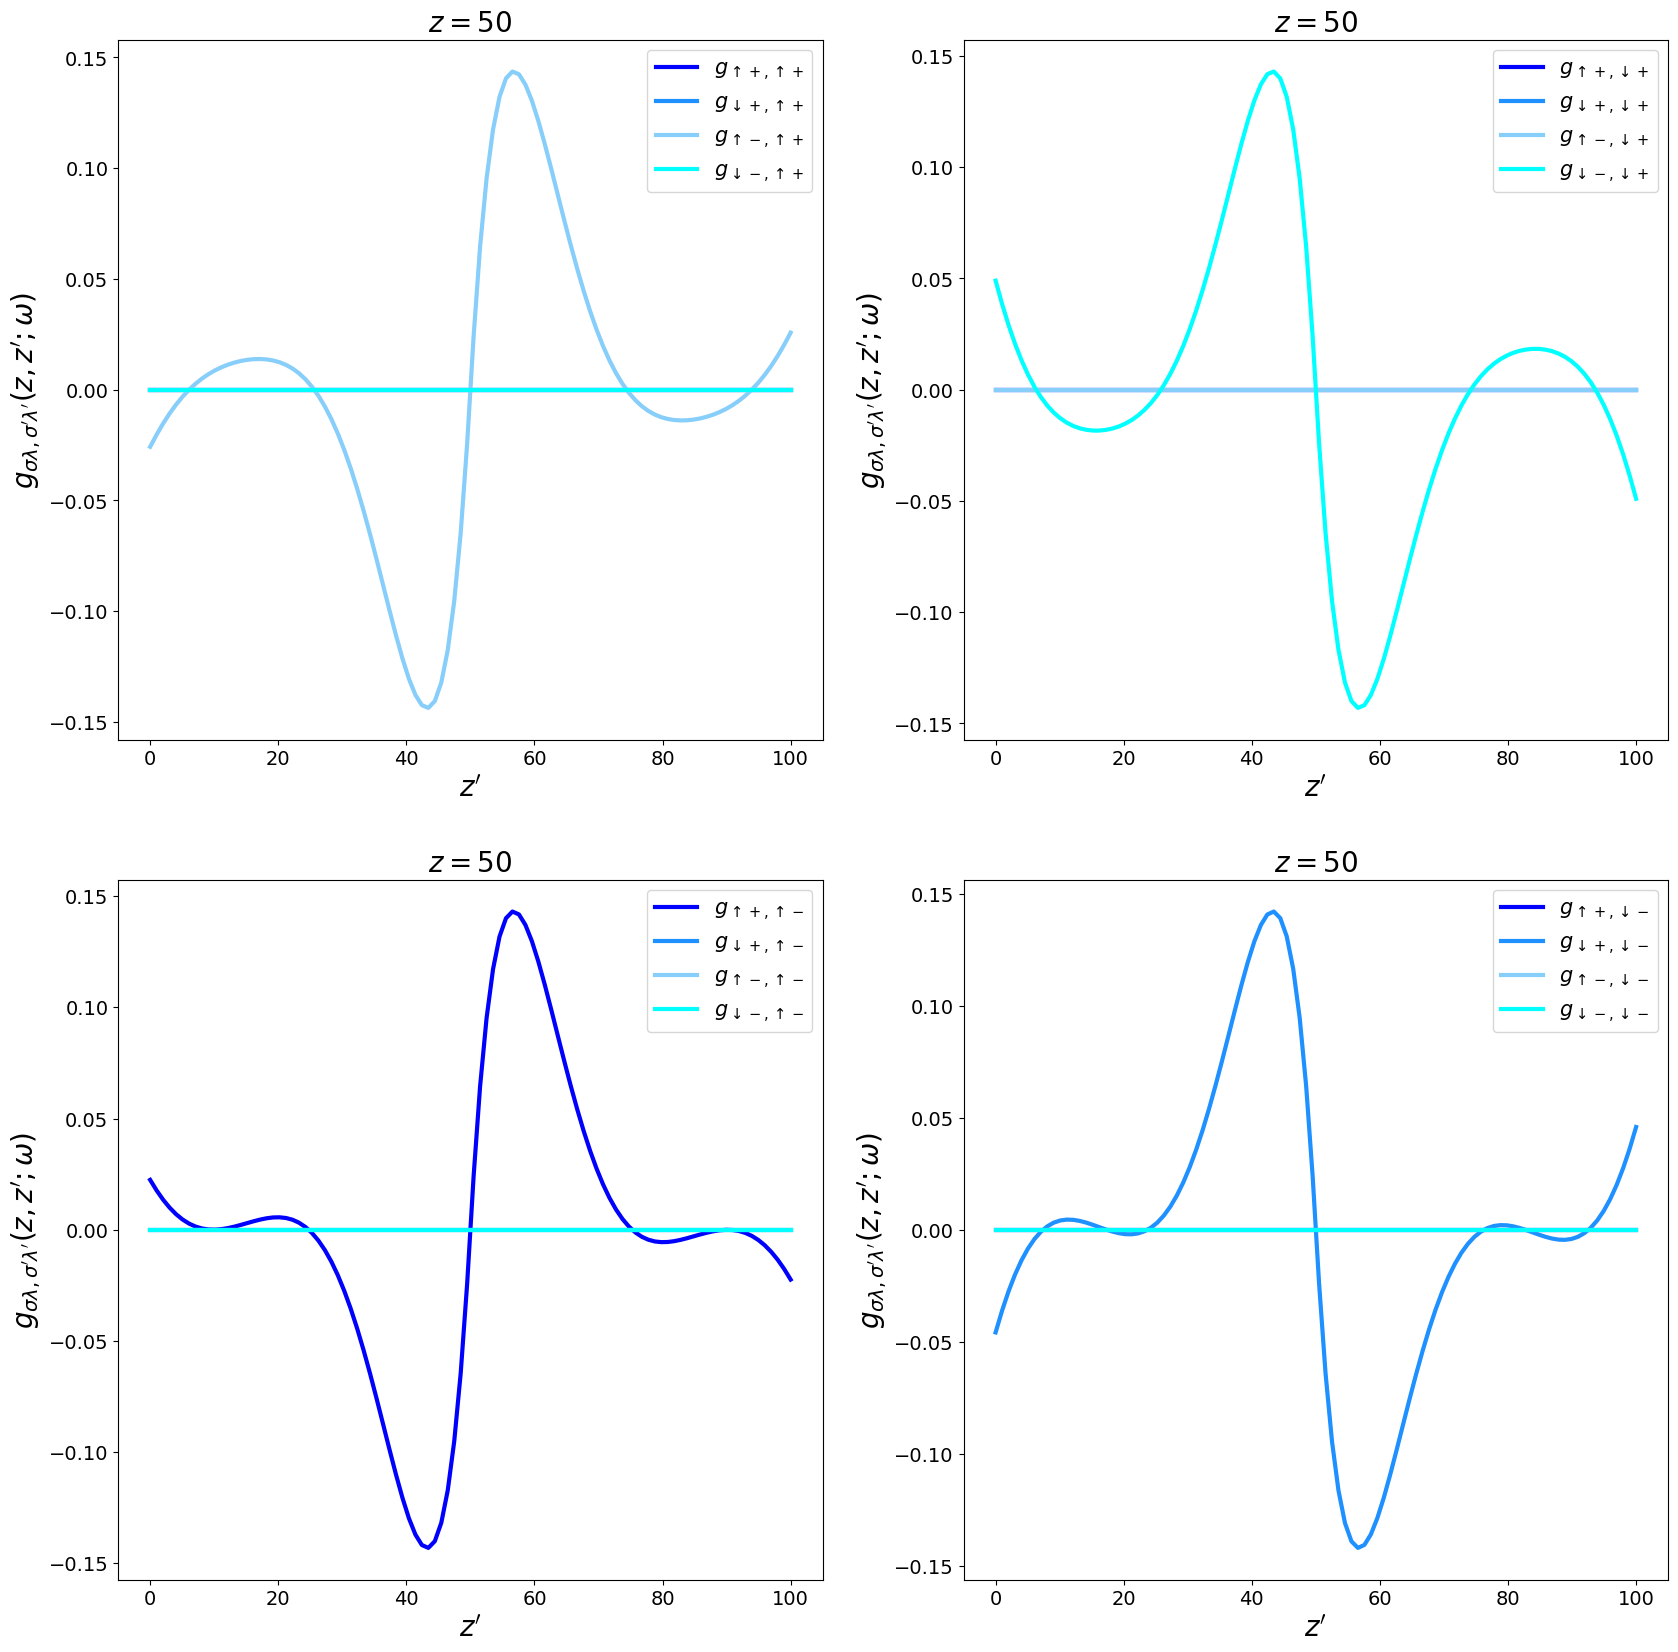

In [15]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # plot the Green's function
        axs[iPic][jPic].plot(Z, [gfZ[idx][irow][icol].imag for idx in range(len(Z))], c=colors[irow], lw=3, label=labels[irow][icol])
    
    axs[iPic][jPic].set_title('$z = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$", fontsize = 20)
            
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font color='red'> **Cross-check** </font>

We check the solution comparing the results with the trivial case where the MTI Hamiltonian is a *diagonal matrix* in spin and parity space.
In order to do so, we select $A_1=A_2=0$ such that we obtain
$$
	h_\parallel(k_x,k_y) =
	\begin{bmatrix}
		\varepsilon_0 + \mu_0 + \Lambda & 0 & 0 & 0 \\[5pt]
		%
		0 & \varepsilon_0 + \mu_0 - \Lambda & 0 + & 0 \\[5pt]
		%
		0 & 0 & \varepsilon_0 - \mu_0 + \Lambda & 0 \\[5pt]
		%
		0 & 0 & 0 & \varepsilon_0 - \mu_0 - \Lambda \\[5pt]
	\end{bmatrix} \,,
$$
$$
	h_{z}(-i\partial_z) = 
	\begin{bmatrix}
		(B_1-D_1)\partial_z^2 & 0 & 0 & 0 \\[5pt]
		%
		0 & (B_1-D_1)\partial_z^2 & 0 & 0 \\[5pt]
		%
		0 & 0 & -(B_1+D_1)\partial_z^2 & 0 \\[5pt]
		%
		0 & 0 & 0 & -(B_1+D_1)\partial_z^2 
	\end{bmatrix} \,,
$$
which is a set of second-order differential equations depending on the wavenumbers $k_x$ and $k_y$ through the quantities $\varepsilon_0 \equiv C + D_2 k^2$, $\mu_0 \equiv M - B_2k^2$ and $k^2 \equiv k_x^2 + k_y^2$.
Since $\hat{h}_{MTI} = h_{\parallel}(k_x,k_y) + \hat{h}_z (i\partial_z)$ is diagonal, its matrix elements can be indicated as
$$
    \Bigl( h_{MTI} \Bigr)_{i,j} = h_{ij} \delta_{ij} \,,
    \qquad
    h_{ij} \equiv \bigl( h_{\parallel} \bigr)_{i,j} + \bigl( h_{z} \bigr)_{i,j} \partial_z^2 \,,
$$
and the original differential equation can be written explicitly as
$$
\begin{gathered}
    \Bigl( \hbar \omega - h_{MTI}(-i\partial_z) \Bigr) \mathcal{G}^{(0)}_{MTI}(z,z';\omega) = \hbar \delta(z-z') \,, \\[5pt]
    %%%
    \sum_k \Bigl( \hbar \omega - h_{ik} \Bigr) \delta_{ik} \, g_{kj}(z,z';\omega)
    = \hbar \delta(z-z') \, \delta_{ij} \,, \\[5pt]
    %%%
    \Bigl( \hbar \omega - h_{ii} \Bigr)  g_{ij}(z,z';\omega)
    = \hbar \delta(z-z') \, \delta_{ij} \,,
\end{gathered}
$$
where $g_{ij}(z,z';\omega)$ are the matrix elements if the unperturbed Green's function ${G}^{(0)}_{MTI}(z,z';\omega)$.
Making the matrix elements $h_{ij}$ explicit, the equation becomes
$$
    \Bigl( \hbar \omega - \bigl( h_{\parallel} \bigr)_{i,i} \Bigr) 
    -
    \bigl( h_{z} \bigr)_{i,i} \partial_z^2 \, g_{ij}(z,z';\omega)
    =
    \hbar \delta(z-z') \, \delta_{ij} \,, 
$$
and can be straightforwardly manipulated into the form
$$
    \partial_z^2 \, g_{ij}(z,z';\omega)
    +
    \beta_i g_{ij}(z,z';\omega)
    =
    \alpha_i \delta(z-z') \, \delta_{ij} \,,
$$
where we defined the coefficients
$$
    \alpha_i = -\frac{\hbar}{\bigl( h_{z} \bigr)_{i,i}} \,,
    \qquad
    \beta_i = -\frac{ \hbar\omega - \bigl( h_{\parallel} \bigr)_{i,i} }{\bigl( h_{z} \bigr)_{i,i}} \,.
$$
Therefore, all the *diagonal* matrix elements of the Green's function must satisfy the equation
$$
    \left( \partial^2_z + \beta_i \right) g_{ii}(z,z') = \alpha_i \delta(z-z') \,,
$$
while the *off-diagonal* ones are solutions to 
$$
\left( \partial^2_z + \beta_i \right) g_{ij}(z,z') = 0 \,.
$$
In the following, we drop the index $i$ in the quantities $\alpha \equiv \alpha_i$ and $\beta \equiv \beta_i$, for the sake of clarity.

#### Off-diagonal
The general solution to the equation 
$$
    \left( \partial^2_z + \beta_i \right) g_{ij}(z,z') = 0 \,,
$$
for the off-diagonal matrix elements can be written as
$$
    g_{ij}(z,z') = A \sin(kz) + B \cos(kz) \,, 
    \qquad
    k \equiv \sqrt{\beta} \,.
$$
However, upon applying the boundary conditions, only the trivial solution is allowed.
Assuming $g_{ij}(z=0,z')=0$ we have that 
$$
    g_{ij}(z=0,z') = A \sin(kz) + B \cos(kz) \Bigl|_{z=0} = B = 0 \,,
    \qquad
    \implies
    \qquad
    \boxed{B=0} \,,
$$
and imposing $g_{ij}(z=d,z')=0$ implies
$$
    g_{ij}(z=d,z') = A \sin(kz) \Bigl|_{z=d} =  A \sin(kd) = 0 \,,
    \qquad
    \implies
    \qquad
    \boxed{A=0} \,.
$$
It is worth noting that for the specific values of $k \equiv k_n$ any solution of the form 
$$
    g_{ij}(z,z') = A \sin(k_n z) \,,
    \qquad
    k_n = \frac{n \pi}{d} \,,
$$ 
satisfies the boundary conditions.

#### Diagonal
In contrast, all the diagonal matrix elements of the Green's function must satisfy an equation of the form
$$
    \left( \partial^2_z + \beta \right) g_{ii}(z,z') = \alpha \delta(z-z') \,.
$$
where we recall that $\alpha \equiv \alpha_i$ and  $\beta \equiv \beta_i$.

---
- i. **Homogeneous solution** \
  For $z\neq z'$ the Dirac delta term can be neglected and the equation becomes homogeneous.
  Its general solution is given by:
  $$
  g_{ii}(z,z') = 
  \begin{cases}
      A \sin(kz) + B \cos(kz)  & \text{for} \qquad z<z' \,, \\[5pt]
      %
      C \sin(kz) + D \cos(kz)   & \text{for} \qquad z>z' \,,
  \end{cases}
  $$
  with $A,B,C,D$ functions of $z'$.

---
- ii. **Neumann Boundary Conditions** \
  We apply the Neumann boundary conditions. For $z=0$ we have 
  $$
  \partial_z g_{ii}(z=0,z') = Ak = 0 \,,
  \qquad
  \implies
   \qquad
  \boxed{A=0} \,,
  $$
  and for $z=d$ we get
  $$
  \partial_z g_{ii}(z=d,z') = C k \cos(kd) - D k \cos(kd) = 0 \,,
  \qquad
  \implies
   \qquad
  \boxed{C= D \tan(kd)} \,.
  $$
  To further simplify the notation we define $\gamma \equiv \tan(kd)$, and the the general solution is reduced to
  $$
      g_{ii}(z,z') = 
      \begin{cases}
          B \cos(kz)  & \text{for} \qquad z<z' \,, \\[5pt]
          %
          D \Bigl\lbrack \gamma \sin(kz) + \cos(kz) \Bigr\rbrack   & \text{for} \qquad z>z' \,,
      \end{cases}
  $$

---
- iii. **Continuity** \
  We assume continuity of the Green's function at $z=z'$. This condition can be written as
  $$
  \begin{gathered}
      g_{ii}(z'+\epsilon,z') = g_{ii}(z'-\epsilon,z') \,, \\[5pt]
      %%%
      B \cos(kz') = D \Bigl\lbrack \gamma \sin(kz') + \cos(kz') \Bigr\rbrack  \,,
  \end{gathered}
  $$
  which implies
  $$
  \boxed{
  B = D \Bigl\lbrack \gamma \tan(kz') + 1 \Bigr\rbrack
  }
  $$

---
- iv. **First Derivative Discontinuity** \
  Finally, we apply the condition for the discontinuity of the first derivative at $z=z'$, which reads as
    $$
  \begin{gathered}
      \partial_z g_{ii}(z'+\epsilon,z') - \partial_z g_{ii}(z'-\epsilon,z') = \alpha \,, \\[5pt]
      %%%
      B k \sin(kz') + D k \Bigl\lbrack \gamma \cos(kz') - \sin(kz') \Bigr\rbrack = \frac{\alpha}{k}\,.
  \end{gathered}
  $$
In this way, we obtain a system of two equations in the unknowns $B$ and $D$ whose solution is 
$$
    \boxed{B = \frac{\alpha}{k \gamma} \Bigl\lbrack \gamma \sin(k z') + \cos(k z') \Bigr\rbrack} \,,
    \qquad
    \boxed{D = \frac{\alpha}{k \gamma} \cos(k z')} \,.
$$



Therefore the solution for the diagonal part of the Green's function is given by
$$
      g_{ii}(z,z') = 
      \begin{cases}
          \frac{\alpha}{k \gamma} 
          \Bigl\lbrack 
          \gamma \sin(k z') + \cos(k z') 
          \Bigr\rbrack \cos(kz)  
          & \text{for} \qquad z<z' \,, \\[5pt]
          %
          \frac{\alpha}{k \gamma}
          \Bigl\lbrack 
          \gamma \sin(kz) + \cos(kz) 
          \Bigr\rbrack \cos(kz')
          & \text{for} \qquad z>z' \,,
      \end{cases}
$$
where we recall that the coefficients $\alpha \equiv \alpha_i$, $\beta \equiv \beta_i$, $\gamma \equiv \gamma_i$ and $k \equiv k_i$ takes a priori different values for the different components.

In [16]:
from MTI_Discretization import eigenstates_Neumann, GMTI_discretized

# Diagonal part trivial case (Z=z', d=thickness)
def GFdiagonal(d, z, Z, kx, ky, L, w, C = -0.0068, D1 = 1.3, D2 = 19.6, M = 0.28, B1 = 10, B2 = 56.6, hbar = 1.):

    # abbreviations
    k = np.sqrt(kx**2+ky**2); e0 = C + D2*k**2; m0 = M - B2*k**2

    # empty array for diagonal elements
    gfdiag = []
    
    # loop over the four diagonal elements
    for idx in range(1,5):

        match idx:     
            case 1:
                hp = e0 + m0 + L; hz = B1-D1
            case 2:
                hp = e0 + m0 - L; hz = B1-D1
            case 3:
                hp = e0 - m0 + L; hz = -B1-D1
            case 4:
                hp = e0 - m0 - L; hz = -B1-D1

        # parameters
        alpha = complex(-hbar/hz,0); beta = complex(-(hbar*w-hp)/hz,0); k = np.sqrt(beta); gamma = np.tan(k*d)

        # left solution
        if z <= Z:
            gii = alpha/(k*gamma) * ( gamma*np.sin(k*Z) + np.cos(k*Z) ) * np.cos(k*z)
        # right solution
        else:
            gii = alpha/(k*gamma) * ( gamma*np.sin(k*z) + np.cos(k*z) ) * np.cos(k*Z) 

        gfdiag.append(gii)

    return np.array(gfdiag)


# parameters
kx = 0.; ky = 0.; L = 0.010; w = 0.0025
# discrete lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# discretized eigenstates
lattice, egval, spinors = eigenstates_Neumann(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L, A1=0, A2=0)

In [17]:
# fixed z' coordinate
iZ = 183; zp = lattice[iZ]; print("z' = " + str(round(zp,2)))

# Green's function from diff. equation
gf = np.array([GF(d=100., z=z, Z=zp, kx=kx, ky=ky, L=L, w=w, A1=0., A2=0.) for z in lattice])

# Green's function from trivial case solution
gfdiagonal = np.array([GFdiagonal(d=100., z=z, Z=zp, kx=kx, ky=ky, L=L, w=w) for z in lattice])

# Green's function from discretization
gf_discretized = np.array([ GMTI_discretized(Nstates=250, egval=egval, spinors=spinors, z=z, Z=iZ, w=w,  eta=0.) for z in range(Nlat)])

z' = 73.49


#### <font color='green'> **Real Part** </font> 

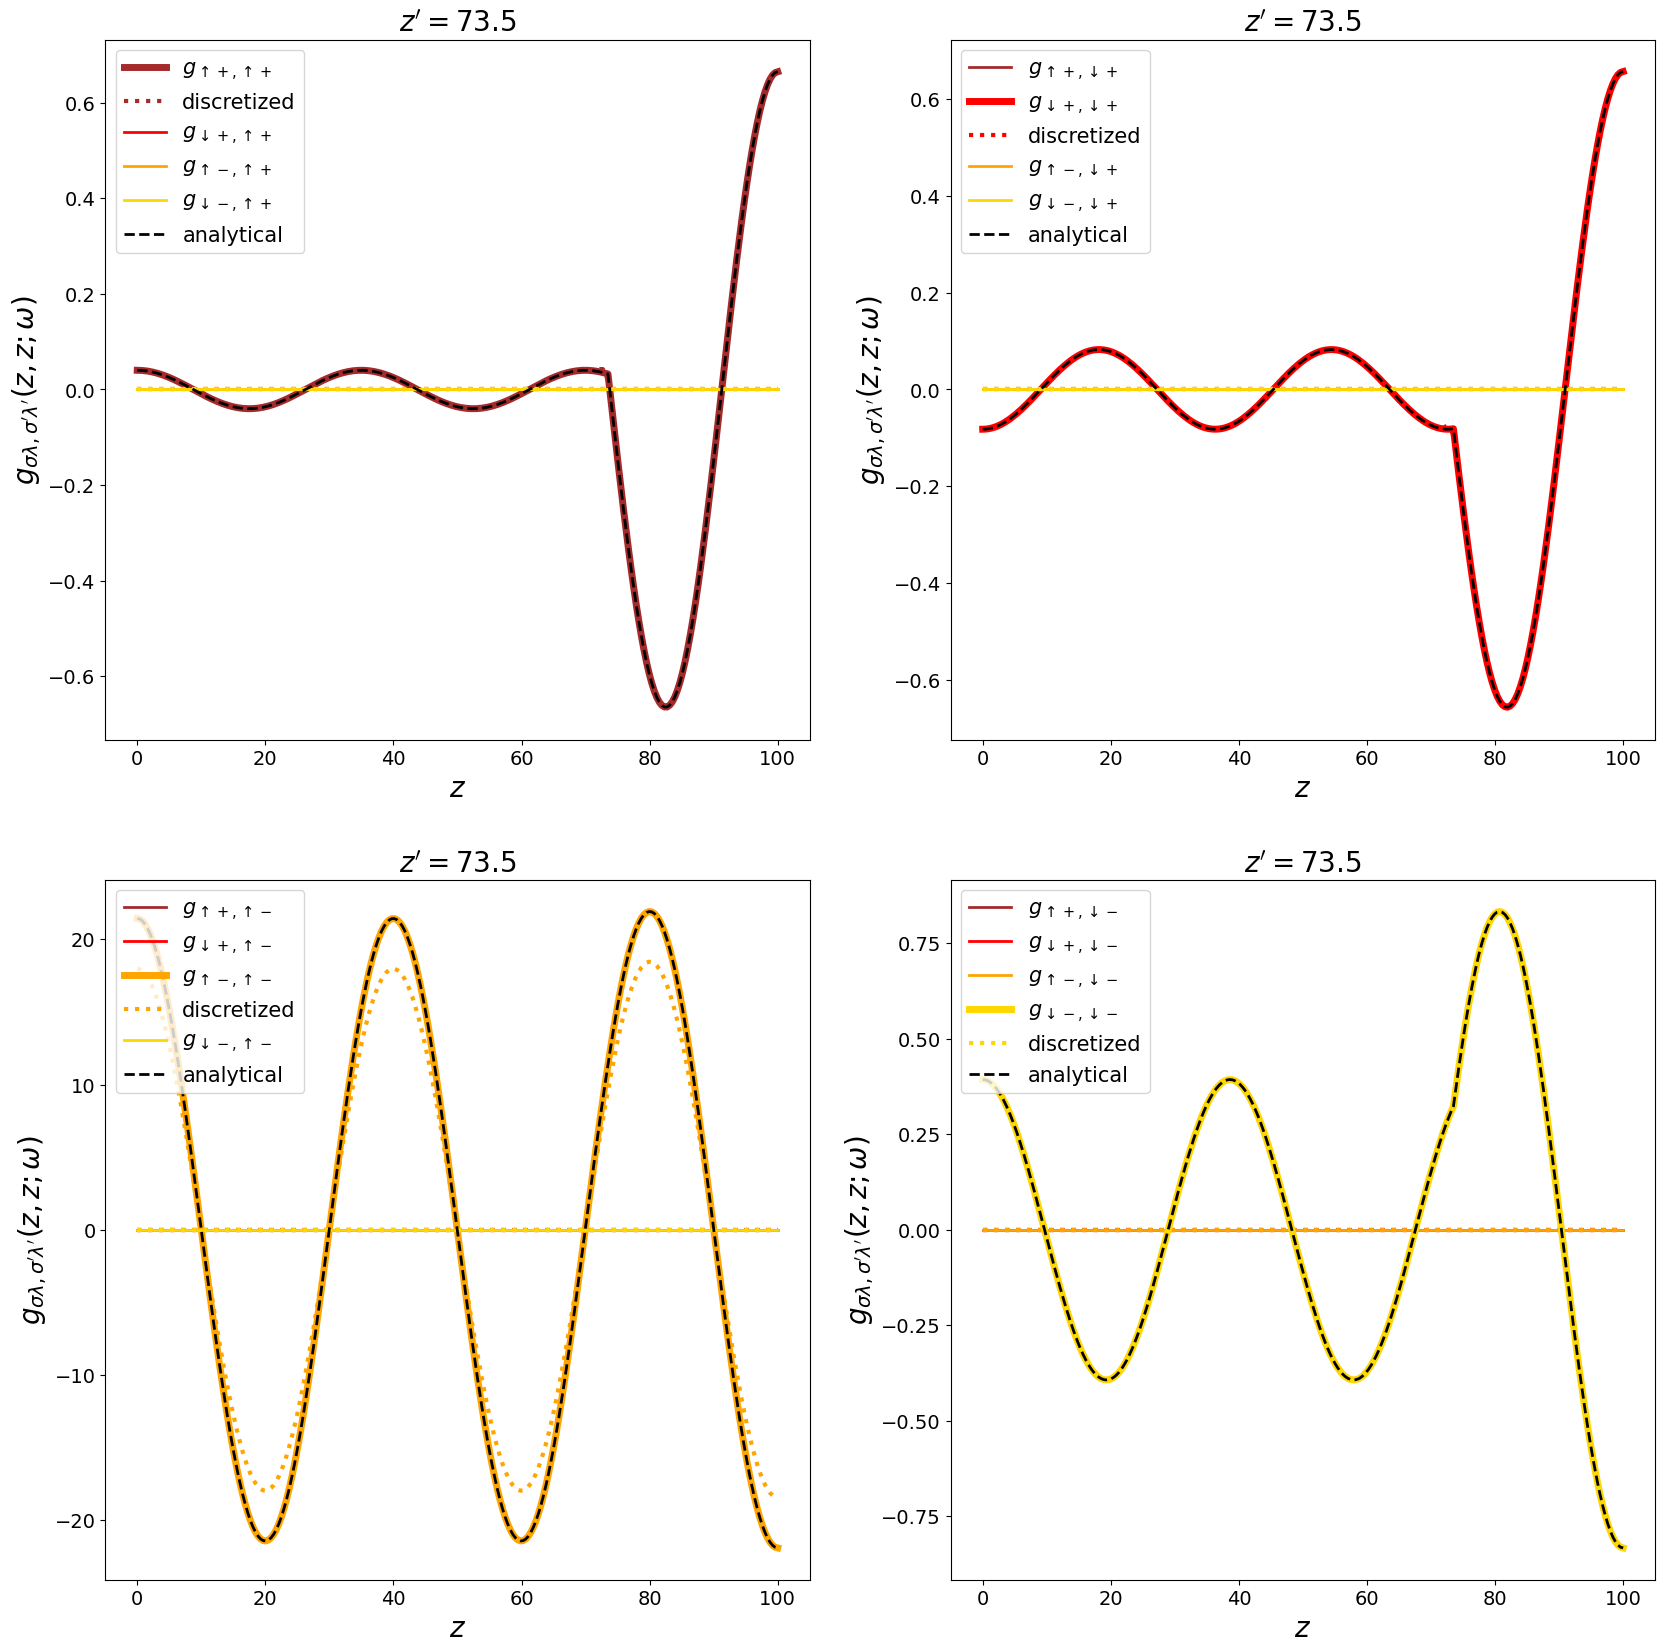

In [18]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):
        # Green's function from diff. eq.
        axs[iPic][jPic].plot(lattice, [gf[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=5 if irow==icol else 2, label=labels[irow][icol])

        # Green's function from discretization
        if irow == icol:
            axs[iPic][jPic].plot(lattice, [gf_discretized[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=3, ls=':', label='discretized')
        else:
            axs[iPic][jPic].plot(lattice, [gf_discretized[idx][irow][icol].real for idx in range(len(lattice))], c=colors[irow], lw=3, ls=':')

    
    # Green's function from analytical solution
    axs[iPic][jPic].plot(lattice, gfdiagonal[:,icol].real, '--', c='black', lw=2, label='analytical');

    axs[iPic][jPic].set_title('$z\' = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);